In [1]:
from datetime import date
import os
from tqdm import tqdm

import yaml
import json

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import pandas_datareader as pdr

from PIL import Image

import quandl
import yfinance as yf
from fredapi import Fred

import plotly
import plotly.graph_objects as go

from dotenv import load_dotenv

# create a .env file with QUANDL_TOKEN=xxxxxx
load_dotenv()
quandl_token = os.getenv('QUANDL_TOKEN')

print(f"numpy                {np.__version__:<20}")
print(f"pandas               {pd.__version__:<20}")
print(f"pandas_datareader    {pdr.__version__:<20}")
print(f"yfinance             {yf.__version__:<20}")
print(f"plotly               {plotly.__version__:<20}")


OUTPUT_PNG=True


numpy                1.25.2              
pandas               2.0.3               
pandas_datareader    0.10.0              
yfinance             0.2.28              
plotly               5.16.1              


### Awesome dataviz


- [BD Econ chartbook](https://github.com/bdecon/US-chartbook) [PDF](https://www.bd-econ.com/chartbook.pdf) (amazing 😎)

- [Visual Capitalist](https://www.visualcapitalist.com/)

### Official data
- [FRED](https://fred.stlouisfed.org/)
- [FRB](https://www.federalreserve.gov/data.htm)
- [OECD](https://data.oecd.org/) [Alt](https://www.oecd-ilibrary.org/statistics)
- [US Treasury](https://home.treasury.gov/)
- [BEA](https://www.bea.gov/data/economic-accounts/international)
- [US Government Open Data](https://data.gov/)
- [Conference Board](https://www.conference-board.org/data/)
- [Eurostat](https://ec.europa.eu/eurostat/data/database) [blog post](https://towardsdatascience.com/using-eurostat-statistical-data-on-europe-with-python-2d77c9b7b02b) 
- [ECB](https://sdw.ecb.europa.eu/)
- [World Bank](https://data.worldbank.org/) [blog post](https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data) [Alt](https://databank.worldbank.org/source/world-development-indicators)
- [IMF](https://data.imf.org/?sk=388dfa60-1d26-4ade-b505-a05a558d9a42) 
https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD
- [UN](http://data.un.org/Default.aspx) [Alt](https://unctadstat.unctad.org/EN/)
- [BIS](https://www.bis.org/statistics/index.htm?m=6%7C37)
- [ADB](https://data.adb.org/)
- [IDB](https://data.iadb.org/DataCatalog/Dataset)
- [WHO](https://apps.who.int/gho/data/node.home)

### Other data

- [Economy.com](https://www.economy.com/Freelunch/)
- [Trading Economics](https://tradingeconomics.com/)
- [NationMaster](https://www.nationmaster.com/)
- [Knoema](https://knoema.com/atlas)
- [IndexMundi](https://www.indexmundi.com/)


### Econ calendars

- [NY Fed](https://www.newyorkfed.org/research/calendars/nationalecon_cal.html)
- [FRED](https://fred.stlouisfed.org/releases/calendar)
- [MarketWatch](https://www.marketwatch.com/economy-politics/calendar)

### Free datasets

- https://datahub.io/collections/economic-data
- https://www.kaggle.com/datasets
- https://github.com/awesomedata/awesome-public-datasets
- https://datasetsearch.research.google.com/
- https://archive.ics.uci.edu/ml/index.php
- https://registry.opendata.aws/
- https://msropendata.com/


In [2]:
# TODO:

# color template
# import plotly.io as pio

# # naming a layout theme for future reference
# pio.templates["google"] = go.layout.Template(
#     layout_colorway=['#4285F4', '#DB4437', '#F4B400', '#0F9D58',
#                      '#185ABC', '#B31412', '#EA8600', '#137333',
#                      '#d2e3fc', '#ceead6']
# )

# # setting Google color palette as default
# pio.templates.default = "google"

# would be nice to write a generic pandas shift by 1 year based on frequency of the dataframe
# get all data incl future from fred
# yield curve chart, other custom charts
# recession shading

# break down retail sales, consumption, employment, price with bar charts or composition flow over time
# change in composition of labor force , status over time

# jolts hires/fires/quits/openings

# hours worked that tracks with gdp

# stock valuations, fed model, shiller model, dividend yield, pe yield, 
# real yields

# dot plot median forecast going out 3 years
# Yield curve
# contributions to GDP
# contributions to inflation
#     #               A466RD3Q052SBEA
# #                 Profit per unit of real gross value added of nonfinancial corporate business: Corporate profits after tax with IVA and CCAdj (unit profits from current production) (A466RD3Q052SBEA)	
# high frequency stuff
#     'DCOILWTICO': {'source': 'FRED', 'freq': 'D'}, 
#     'DEXUSEU': {'source': 'FRED', 'freq': 'D'},
#     'GVZCLS': {'source': 'FRED', 'freq': 'D'}, 
#     'VIXCLS': {'source': 'FRED', 'freq': 'D'}, 
#     'DIVIDEND': {'source': 'FRED', 'freq': 'Q'},
#     'BCHAIN/MKPRU': {'source': 'QUANDL', 'freq': 'D'},
#     'USTREASURY/YIELD': {'source': 'QUANDL', 'freq': 'D'}, 
#     'USTREASURY/REALYIELD': {'source': 'QUANDL', 'freq': 'D'},
#     'MULTPL/SHILLER_PE_RATIO_MONTH': {'source': 'QUANDL', 'freq': 'M'}, 
#     'LBMA/GOLD': {'source': 'QUANDL', 'freq': 'D'},
#     '^SPX': {'source': 'STOOQ', 'freq': 'D'}, 
#     '^DJI': {'source': 'STOOQ', 'freq': 'D'}
# }
#     # balance sheets, debt household wealth

# override download dates, run future dates for e.g. dotplot

# add option to save figure as HTML
# python save pickle at the end
# make a github.io chartbook page
# run a process on hetzner
# - git clone druce.github.io
# - run update with all the figures
# - git push "figures date"

# currently yaml just defines downloads
# could define a whole chartbook
# add section. order for each chart
# for each section, for each chart in order, run transform and default chart on each one in order
# pickle a set of plotly options to define a default chart
# for a complex chart, define a custom transform of multiple series, different set of plotly options and df input schmea


In [3]:
curdate = date.today()
start = date(year=curdate.year-10, month=curdate.month, day=curdate.day)
# go far out to capture economic projectsions, future not read by default
end = date(year=curdate.year+10, month=curdate.month, day=curdate.day)
macro_indicators = dict()
start

datetime.date(2013, 8, 26)

In [4]:
# load indicators from YAML file
with open("indicators.yaml", "r") as stream:
    try:
        INDICATORS=yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
        

In [5]:
FRED_INDICATORS = INDICATORS['FRED'].keys()
QUANDL_INDICATORS = INDICATORS['QUANDL'].keys() 
STOOQ_INDICATORS = INDICATORS['STOOQ'].keys()


In [6]:
# download from quandl
tq_quandl = tqdm(QUANDL_INDICATORS)
tq_quandl.set_description("Downloading data from QUANDL")
for indicator in tq_quandl:
    # modify all indicator names '/': like "USTREASURY/YIELD" to "USTREASURY_YIELD"
    macro_indicators[indicator.replace("/", "_")] = quandl.get(indicator, start_date=start, end_date=end, 
                                                               authtoken=quandl_token)

for indicator in list(INDICATORS['QUANDL'].keys()):
    INDICATORS['QUANDL'][indicator.replace("/", "_")] = INDICATORS['QUANDL'].pop(indicator)

QUANDL_INDICATORS = [indicator.replace("/", "_") for indicator in QUANDL_INDICATORS]

macro_indicators['USTREASURY_YIELD'].head(5)


1 MO  2 MO  3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  \
Date                                                                      
2013-08-26  0.03   NaN  0.04  0.07  0.13  0.41  0.79  1.61  2.23   2.79   
2013-08-27  0.04   NaN  0.05  0.07  0.12  0.38  0.77  1.56  2.15   2.72   
2013-08-28  0.04   NaN  0.03  0.07  0.14  0.40  0.79  1.62  2.22   2.78   
2013-08-29  0.03   NaN  0.02  0.06  0.14  0.39  0.79  1.60  2.20   2.75   
2013-08-30  0.02   NaN  0.03  0.05  0.13  0.39  0.79  1.62  2.24   2.78   

            20 YR  30 YR  
Date                      
2013-08-26   3.52   3.77  
2013-08-27   3.45   3.70  
2013-08-28   3.50   3.75  
2013-08-29   3.45   3.70  
2013-08-30   3.46   3.70

In [7]:
macro_indicators['MULTPL_SHILLER_PE_RATIO_MONTH'].sort_index()[-10:]

Value
Date             
2023-03-01  27.94
2023-03-31  29.35
2023-04-01  28.77
2023-05-01  28.82
2023-05-31  29.30
2023-06-01  30.06
2023-06-30  31.07
2023-07-01  31.14
2023-07-31  31.99
2023-08-01  31.36

In [8]:
# download from FRED
tq_fred = tqdm(FRED_INDICATORS)
tq_fred.set_description('Downloading data from FRED')

for indicator in tq_fred:
    macro_indicators[indicator] = pdr.fred.FredReader(indicator, start=start, end=end, timeout=90).read()

macro_indicators['GDP'].head(4)


GDP
DATE                 
2013-10-01  17133.114
2014-01-01  17144.281
2014-04-01  17462.703
2014-07-01  17743.227

In [9]:
# download from stooq
for indicator in tqdm(STOOQ_INDICATORS):
    macro_indicators[indicator.replace("^", "")]= pdr.get_data_stooq(indicator, start, end)
    
macro_indicators['SPX'].head(5)


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


Open     High      Low    Close        Volume
Date                                                        
2023-08-25  4389.38  4418.46  4356.29  4405.71  1.452036e+09
2023-08-24  4455.16  4458.30  4375.55  4376.31  2.082567e+09
2023-08-23  4396.44  4443.18  4396.44  4436.01  2.021761e+09
2023-08-22  4415.33  4418.59  4382.77  4387.55  1.904586e+09
2023-08-21  4380.28  4407.55  4360.30  4399.77  2.058836e+09

In [10]:
# merge keys to have dict of all regardless of source
ALL_INDICATORS =  {**INDICATORS['FRED'], **INDICATORS['QUANDL'],  **INDICATORS['STOOQ']}

In [11]:
generic_layout = dict(
    autosize=True,
            # width=640,
            # height=480,            
            margin={'l': 10, 'r': 15, 't': 40},
            paper_bgcolor="white",
            #plot_bgcolor="white",
            showlegend=False,
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="left",
                x=0
            ),
            xaxis={
                'ticks': 'inside',
                'showgrid': True,            # thin lines in the background
                'zeroline': False,           # thick line at x=0
                'visible': True,             # numbers below
                'showline': True,            # Show X-Axis
                'linecolor': 'black',        # Color of X-axis
                'tickfont_color': 'black',   # Color of ticks
                'showticklabels': True,      # Show X labels
                'mirror': True,              # draw right axis
            },
            yaxis={
                'ticks': 'inside',
                'showgrid': True,            # thin lines in the background
                'zeroline': False,           # thick line at x=0
                'visible': True,             # numbers below
                'showline': True,            # Show X-Axis
                'linecolor': 'black',        # Color of X-axis
                'tickfont_color': 'black',   # Color of ticks
                'showticklabels': True,      # Show X labels
                'side': 'left',
                'mirror': True,
            },
        )

with open('generic.json', 'w') as outfile:
    outfile.write(json.dumps(generic_layout, indent=4))
    

In [12]:
periods = {
    'Q': 4,
    'M': 12,
    'W': 52,
}

yaxis_titles = {
    'YOY': "YoY %Ch",
    'NONE': "Level",
}
    

In [131]:
# True to make PNGs, False for interactive JS
def chart_generic(df=None,
                  col=None,
                  title=None,
                  xaxis_title=None,
                  yaxis_title=None,
                  recessions=False,
                  output_png=OUTPUT_PNG,
                  **kwargs
                 ):

    fig = go.Figure(
        data=[go.Scatter(y=df[col],
                         x=df.index.to_list(),
                         line_width=2,
                         # color_discrete_sequence=plotly.colors.qualitative.Dark24
                        ),
             ],
        layout=generic_layout)
    
    fig.update_layout(dict(title=title,
                           xaxis_title=xaxis_title,
                           yaxis_title=yaxis_title,
                          ))
    if output_png:
        fig.write_image("images/%s.jpg" % col)
        return Image.open("images/%s.jpg" % col)        
    else:
        return fig
    

In [132]:
def do_transform(**kwargs):
    """given a dataframe, apply transforms like yoy"""    
    df = kwargs['df']
    indicator = kwargs.setdefault('indicator', "")
    transform = kwargs.setdefault('transform', 'NONE')
    freq = kwargs.setdefault('freq', 'M')
       
    col = "%s_%s_%s" % (indicator, freq, transform)
    df = df.set_index(df.index.astype("period[%s]" % freq).to_timestamp(freq=freq))
    if transform == 'NONE':
        df[col] = df[df.columns[0]]
        
    if transform == 'YOY':
        if freq=='D':
            # offset 1 year, prev business day if not business day
            df['date_1y'] = df.index - pd.offsets.DateOffset(years=1) + pd.offsets.Day() - pd.offsets.BDay()
            # get previous val
            prev_if_exists = lambda x: df.loc[x.date_1y][indicator] if x.date_1y in df.index else np.nan
            df['prev_1y'] = df.apply(prev_if_exists, axis='columns')
            # any NAs, get previous row
            df['prev_1y'] = df['prev_1y'].ffill(axis = 0)
            df[col] = df[indicator] / df['prev_1y'] * 100 - 100
        else:
            df[col] = df[indicator].pct_change(periods=periods[freq], freq=freq) * 100
    df = df.dropna()
    
    retdict = kwargs
    retdict['col']=col
    retdict['yaxis_title'] = yaxis_titles[transform]
    retdict['df'] = df
    
    return retdict



In [133]:
def chartbook_panel(indicator):
    indicator_params = ALL_INDICATORS[indicator]
    indicator_params['indicator'] = indicator
    indicator_params['df'] = macro_indicators[indicator]
    chart_params = do_transform(**indicator_params)
    return chart_generic(**chart_params)


# GDP

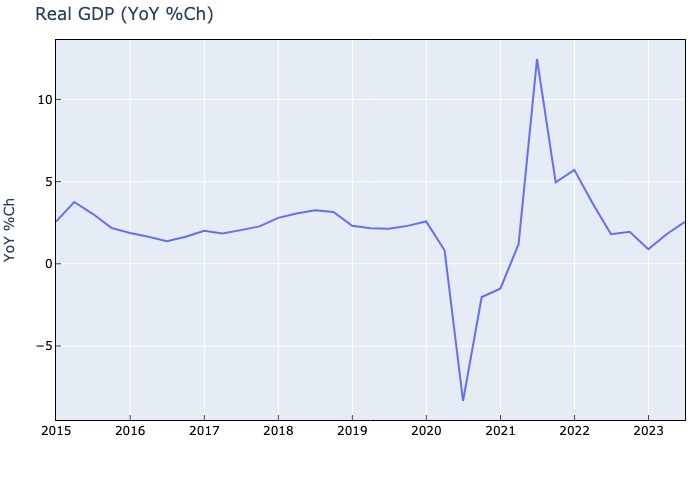

In [134]:
chartbook_panel('GDPC1')


In [126]:
chartbook_panel('GDP')


TypeError: write_image() got an unexpected keyword argument 'mode'

ValueError: Could not save to JPEG for display

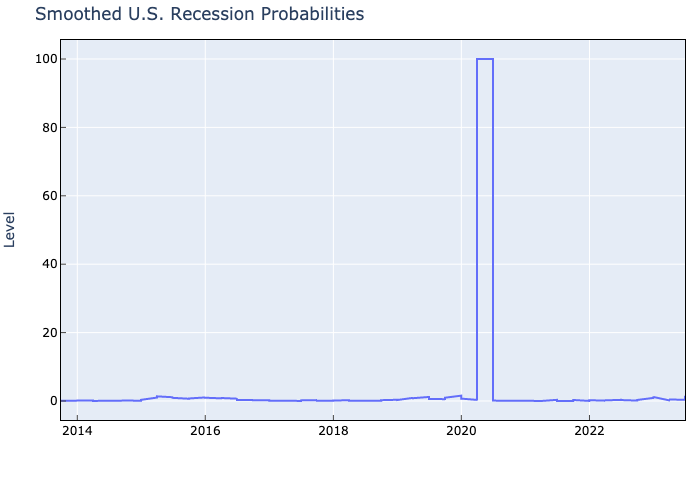

In [18]:
chartbook_panel('RECPROUSM156N')


ValueError: Could not save to JPEG for display

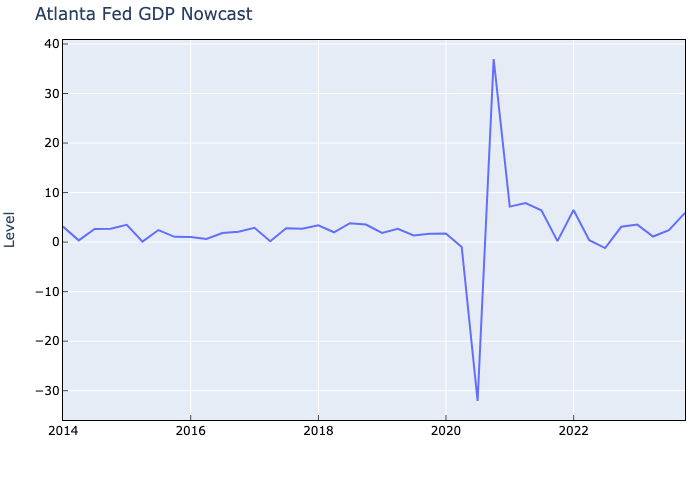

In [19]:
chartbook_panel('GDPNOW')

ValueError: Could not save to JPEG for display

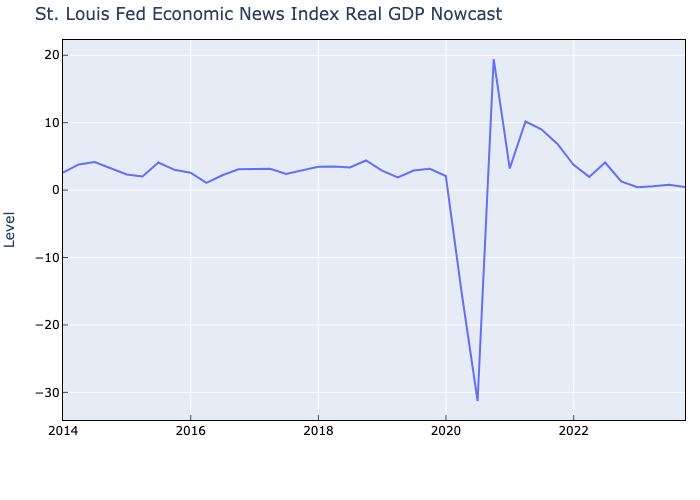

In [20]:
chartbook_panel('STLENI')

# Prices

ValueError: Could not save to JPEG for display

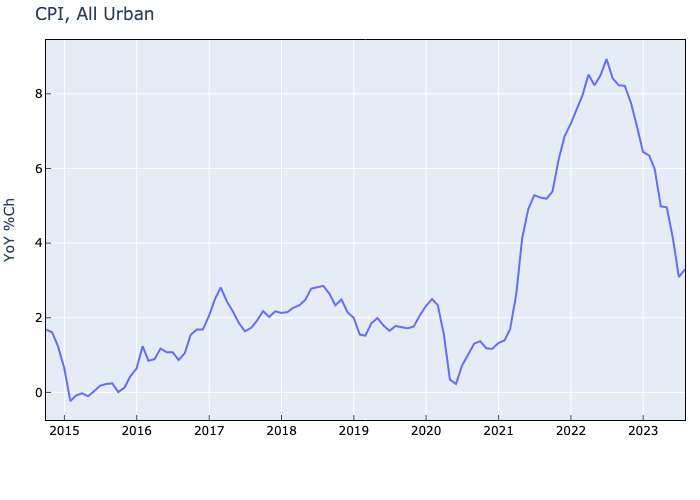

In [21]:
chartbook_panel('CPIAUCSL')


ValueError: Could not save to JPEG for display

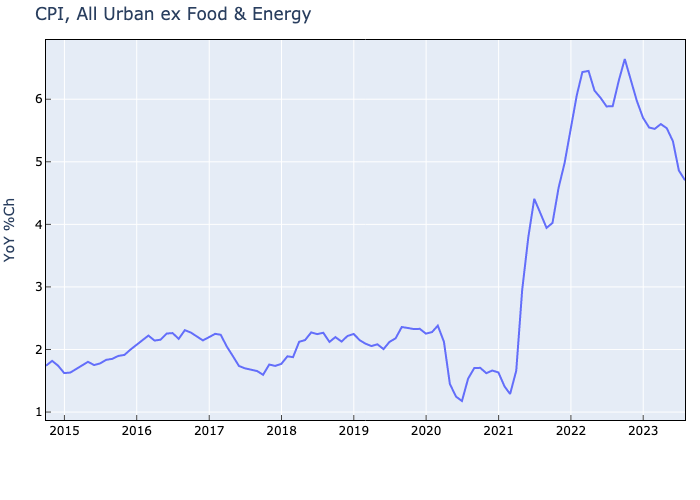

In [22]:
chartbook_panel('CPILFESL')


ValueError: Could not save to JPEG for display

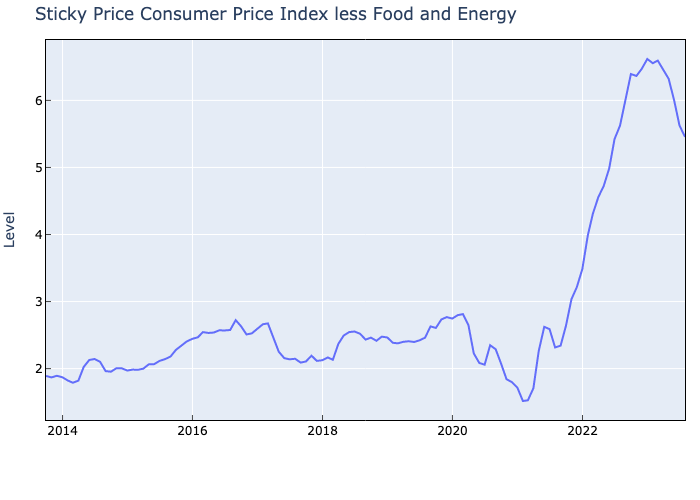

In [23]:
chartbook_panel('CORESTICKM159SFRBATL')


ValueError: Could not save to JPEG for display

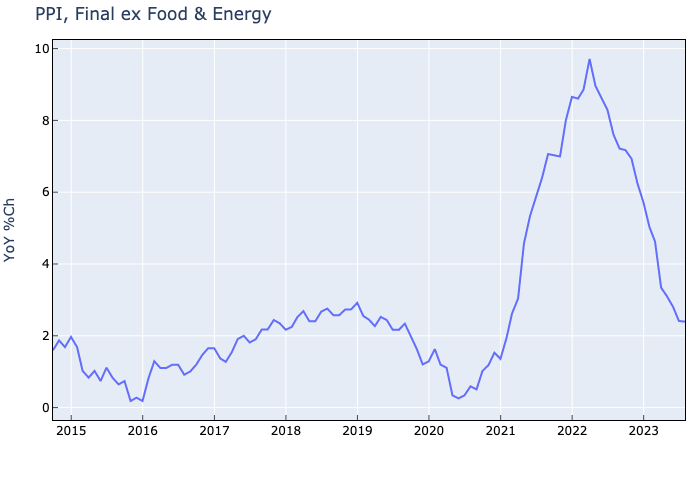

In [24]:
chartbook_panel('PPICOR')


ValueError: Could not save to JPEG for display

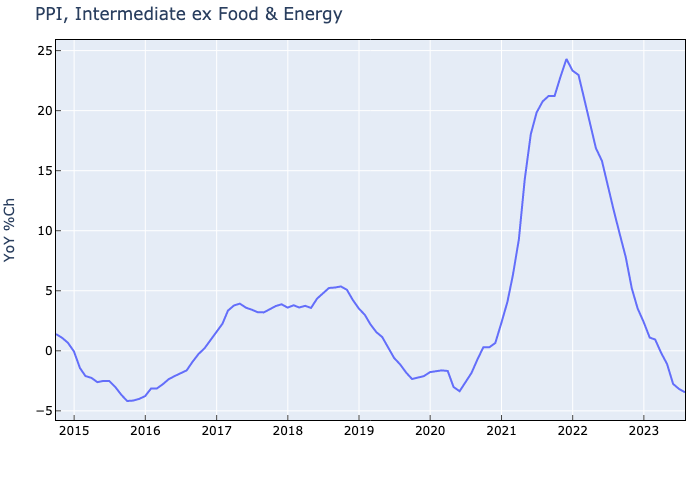

In [25]:
chartbook_panel('WPUID69115')


ValueError: Could not save to JPEG for display

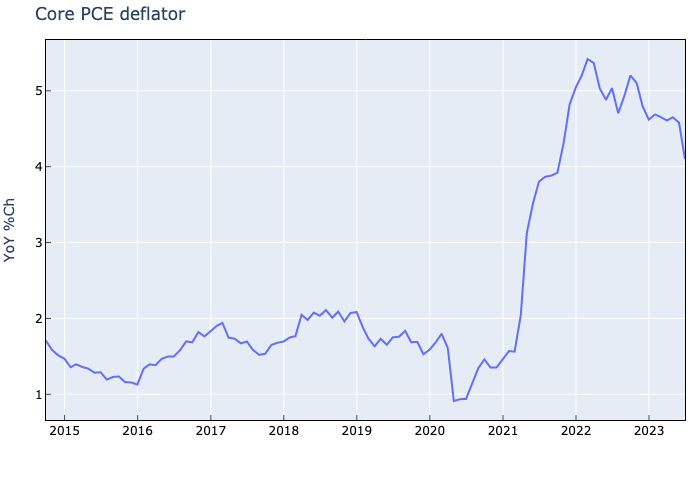

In [26]:
chartbook_panel('PCEPILFE')


ValueError: Could not save to JPEG for display

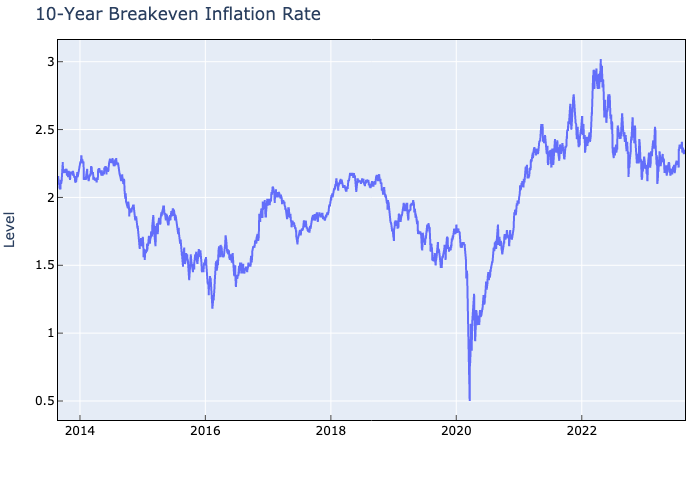

In [27]:
chartbook_panel('T10YIE')


ValueError: Could not save to JPEG for display

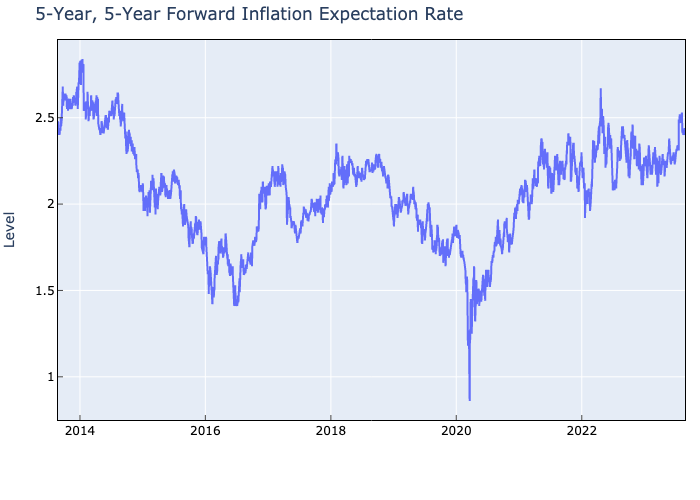

In [28]:
chartbook_panel('T5YIFR')


# Monetary Policy and Rates

ValueError: Could not save to JPEG for display

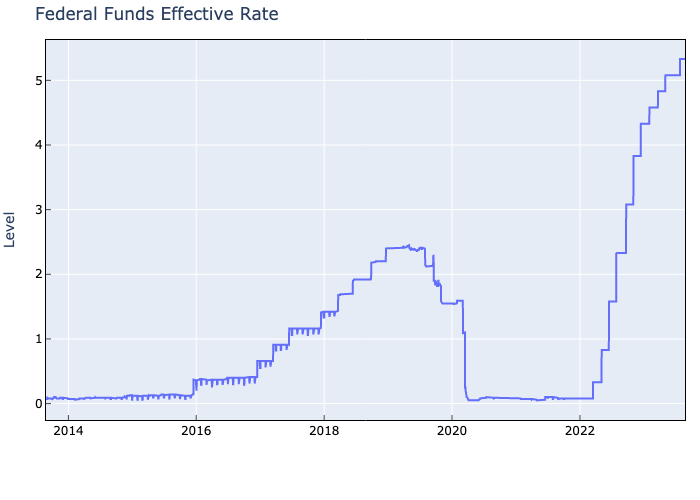

In [29]:
chartbook_panel('DFF')


ValueError: Could not save to JPEG for display

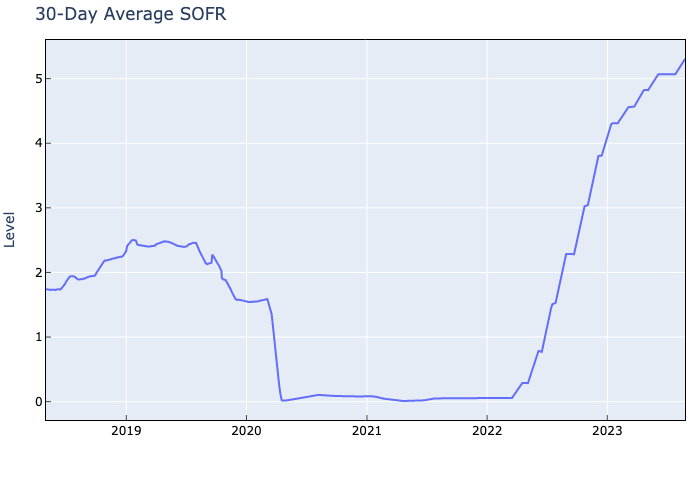

In [30]:
chartbook_panel('SOFR30DAYAVG')


ValueError: Could not save to JPEG for display

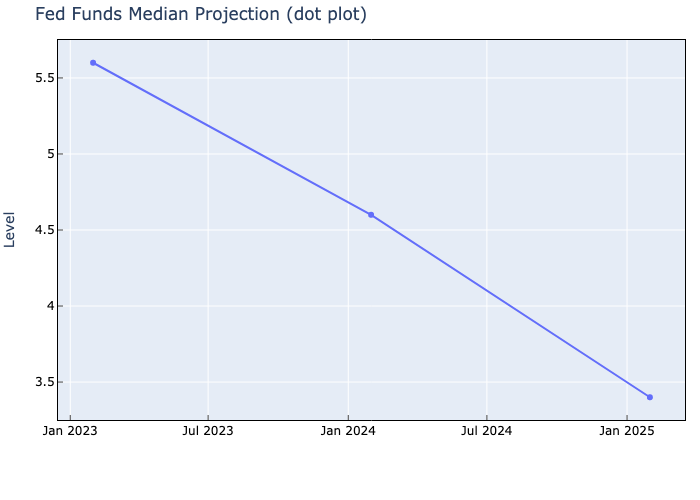

In [31]:
chartbook_panel('FEDTARMD')


In [32]:
# Fed Funds Median Projection (dot plot) None Level

# needs special handling, chart through 2025
# indicator = 'FEDTARMD'

# indicator_params = INDICATORS[indicator]
# indicator_params['df'] = macro_indicators[indicator]

# chart_params = do_transform(**indicator_params)
# yoy_m(**chart_params)


In [33]:
ychistory = macro_indicators['USTREASURY_YIELD']
ycdf_last = ychistory.index[-1]

ycdf_1y = ycdf_last - pd.offsets.DateOffset(years=1) + pd.offsets.Day() - pd.offsets.BDay()
if not ycdf_1y in ychistory.index:
    ycdf_1y += pd.offsets.BDay()
    
ycdf_3m = ycdf_last - pd.offsets.DateOffset(months=3) + pd.offsets.Day() - pd.offsets.BDay()
if not ycdf_3m in ychistory.index:
    ycdf_3m += pd.offsets.BDay()

ycdf_1m = ycdf_last - pd.offsets.DateOffset(months=1) + pd.offsets.Day() - pd.offsets.BDay()
if not ycdf_1m in ychistory.index:
    ycdf_1m += pd.offsets.BDay()
    
ycdf_1w = ycdf_last - pd.offsets.DateOffset(weeks=1) + pd.offsets.Day() - pd.offsets.BDay()
if not ycdf_1w in ychistory.index:
    ycdf_1w += pd.offsets.BDay()

ycdf = ychistory.loc[ychistory.index==ycdf_last] \
    .transpose()
ycdf.columns = ['YIELDCURVE']

tempdf = ychistory.loc[ychistory.index==ycdf_1y] \
    .transpose()
tempdf.columns = ['1Y']
ycdf['1Y'] = tempdf['1Y'].tolist()

tempdf = ychistory.loc[ychistory.index==ycdf_3m] \
    .transpose()
tempdf.columns = ['3M']
ycdf['3M'] = tempdf['3M'].tolist()

tempdf = ychistory.loc[ychistory.index==ycdf_1m] \
    .transpose()
tempdf.columns = ['1M']
ycdf['1M'] = tempdf['1M'].tolist()

tempdf = ychistory.loc[ychistory.index==ycdf_1w] \
    .transpose()
tempdf.columns = ['1W']
ycdf['1W'] = tempdf['1W'].tolist()

ycdf['X'] = [1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]
ycdf=ycdf.set_index('X')

ycdf

col = 'YIELDCURVE'
title = 'Yield Curve'
xaxis_title = 'Term'
yaxis_title = 'Yield'
fig = go.Figure(
    data=[go.Scatter(y=ycdf[col],
                     x=ycdf.index.to_list(),
                     name="latest",
                     line_width=2,
                     # color_discrete_sequence=plotly.colors.qualitative.Dark24
                    ),
#           go.Scatter(y=ycdf['3M'],
#                      x=ycdf.index.to_list(),
#                      name="3 months ago",
#                      line_width=2,
#                      # color_discrete_sequence=plotly.colors.qualitative.Dark24
#                     ),
#           go.Scatter(y=ycdf['1M'],
#                      x=ycdf.index.to_list(),
#                      name="1 month ago",
#                      line_width=2,
#                      # color_discrete_sequence=plotly.colors.qualitative.Dark24
#                     ),
          go.Scatter(y=ycdf['1W'],
                     x=ycdf.index.to_list(),
                     name="1 week ago",
                     line_width=2,
                     # color_discrete_sequence=plotly.colors.qualitative.Dark24
                    ),
          go.Scatter(y=ycdf['1Y'],
                     x=ycdf.index.to_list(),
                     name="1 year ago",
                     line_width=2,
                     # color_discrete_sequence=plotly.colors.qualitative.Dark24
                    ),          
         ],
    layout=generic_layout)

fig.update_layout(dict(title=title,
                       xaxis_title=xaxis_title,
                       yaxis_title=yaxis_title,
                      ))

fig

ValueError: Could not save to JPEG for display

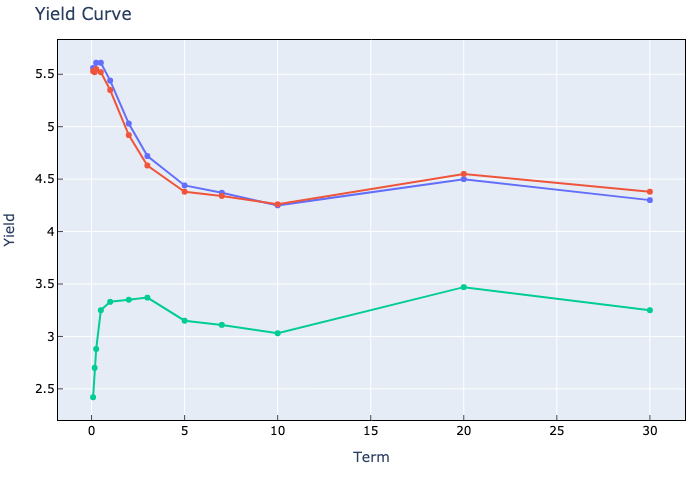

In [34]:
fig.write_image("images/%s.png" % col)
Image.open("images/%s.png" % col)        


ValueError: Could not save to JPEG for display

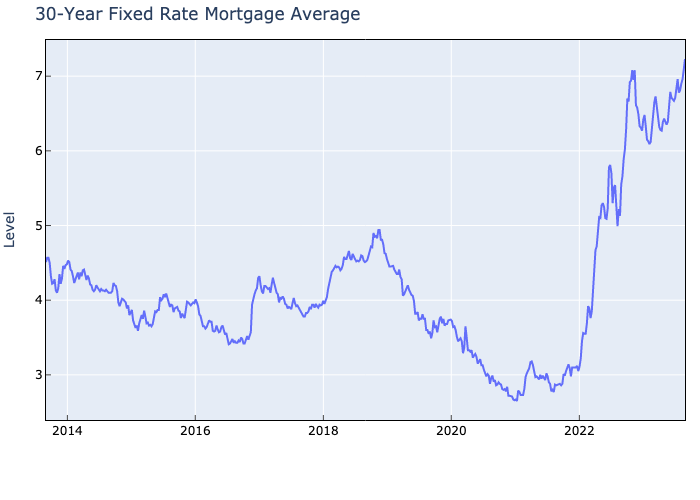

In [35]:
chartbook_panel('MORTGAGE30US')


ValueError: Could not save to JPEG for display

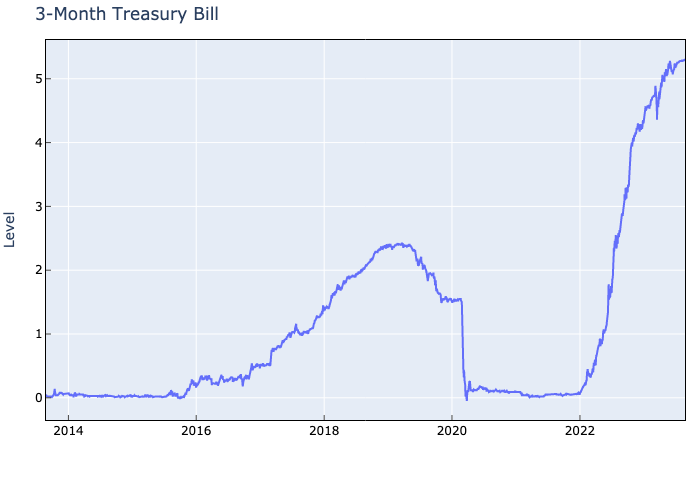

In [36]:
chartbook_panel('DTB3')


ValueError: Could not save to JPEG for display

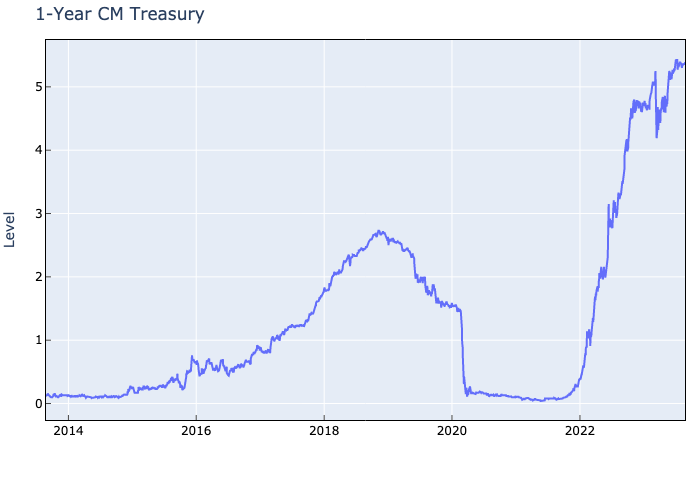

In [37]:
chartbook_panel('DGS1')


ValueError: Could not save to JPEG for display

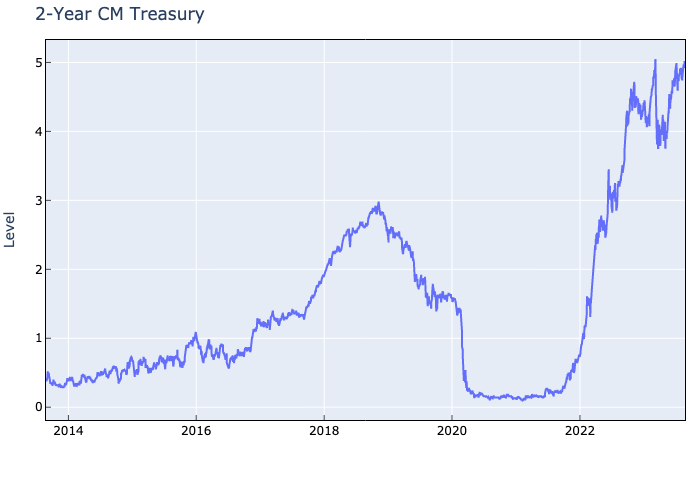

In [38]:
chartbook_panel('DGS2')


ValueError: Could not save to JPEG for display

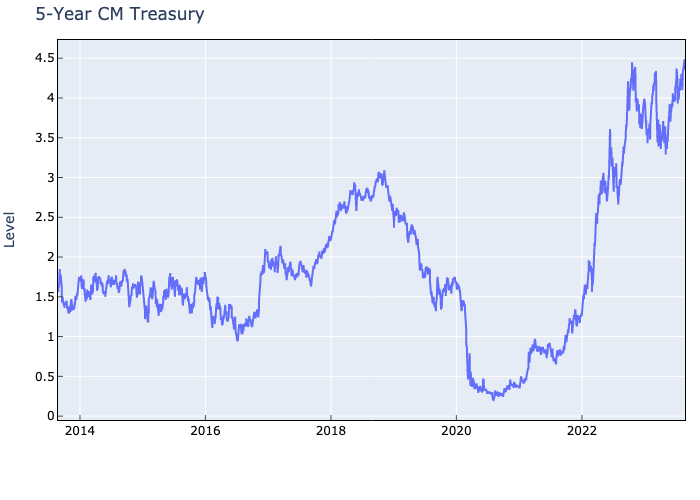

In [39]:
chartbook_panel('DGS5')


ValueError: Could not save to JPEG for display

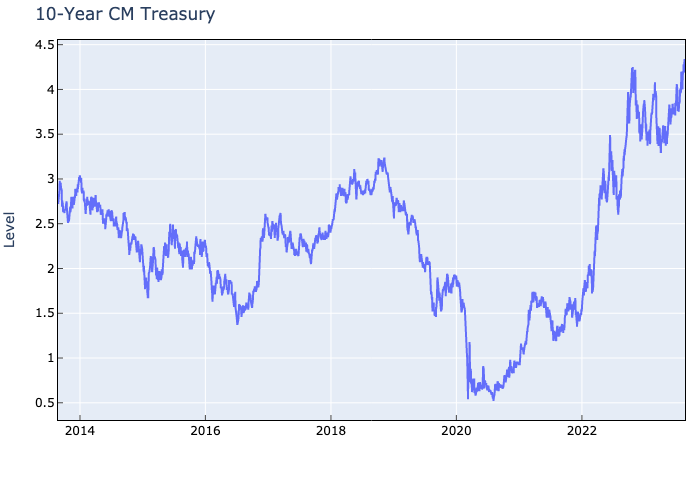

In [40]:
chartbook_panel('DGS10')


ValueError: Could not save to JPEG for display

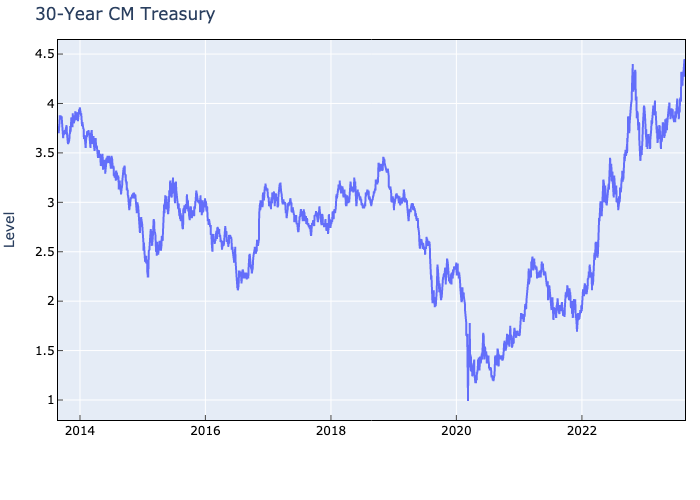

In [41]:
chartbook_panel('DGS30')


ValueError: Could not save to JPEG for display

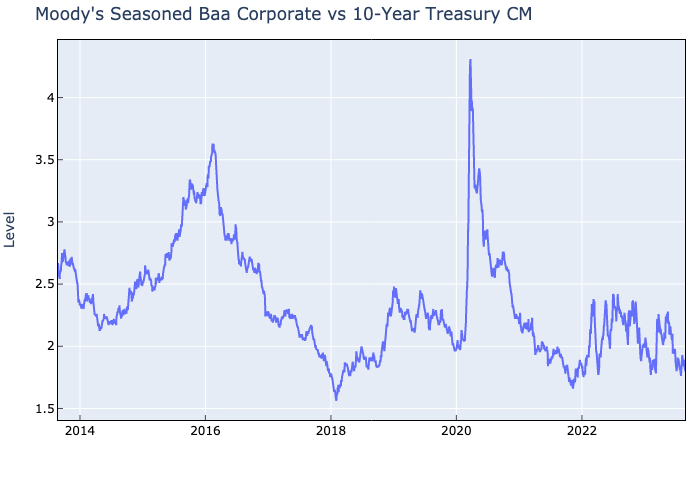

In [42]:
chartbook_panel('BAA10Y')


ValueError: Could not save to JPEG for display

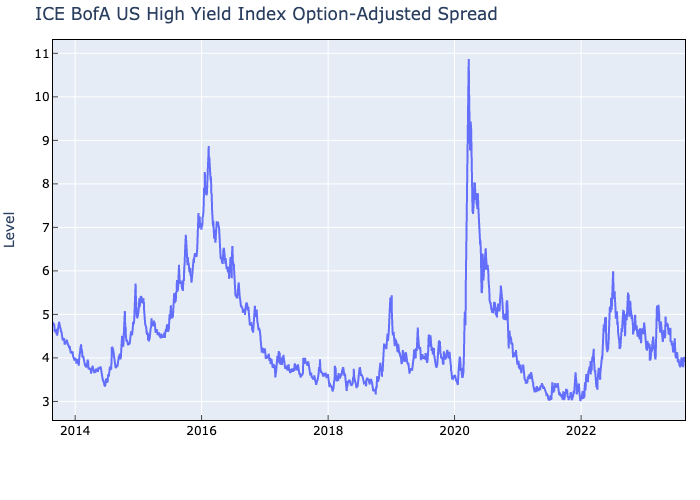

In [43]:
chartbook_panel('BAMLH0A0HYM2')


ValueError: Could not save to JPEG for display

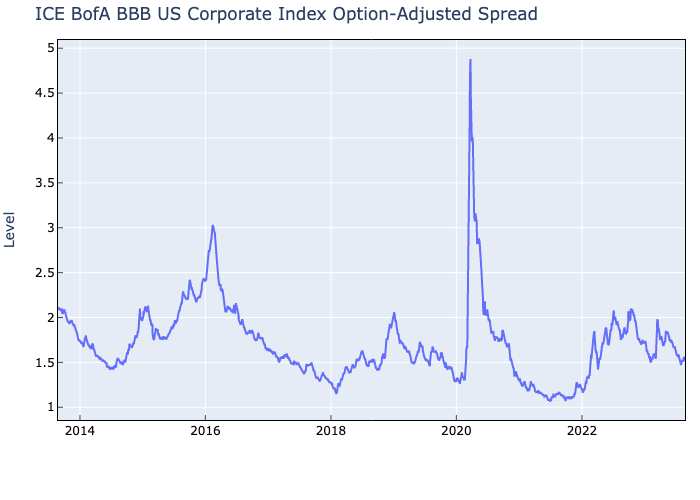

In [44]:
chartbook_panel('BAMLC0A4CBBB')


ValueError: Could not save to JPEG for display

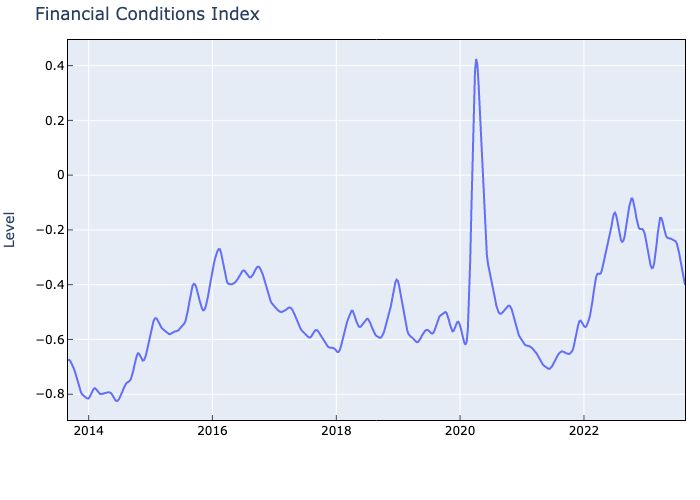

In [45]:
chartbook_panel('NFCI')


ValueError: Could not save to JPEG for display

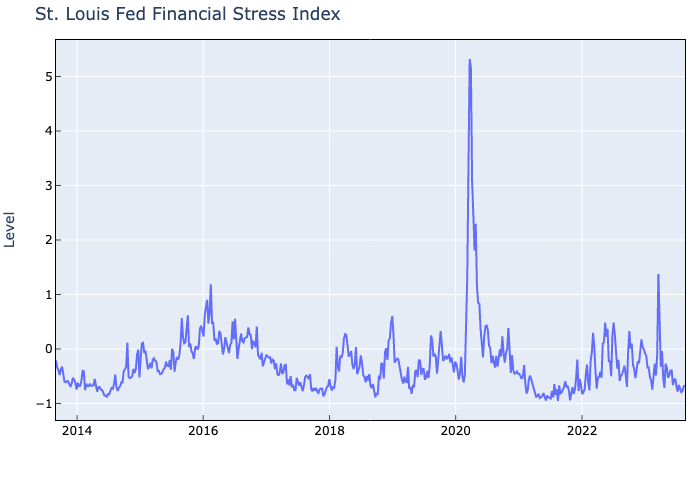

In [46]:
chartbook_panel('STLFSI4')


ValueError: Could not save to JPEG for display

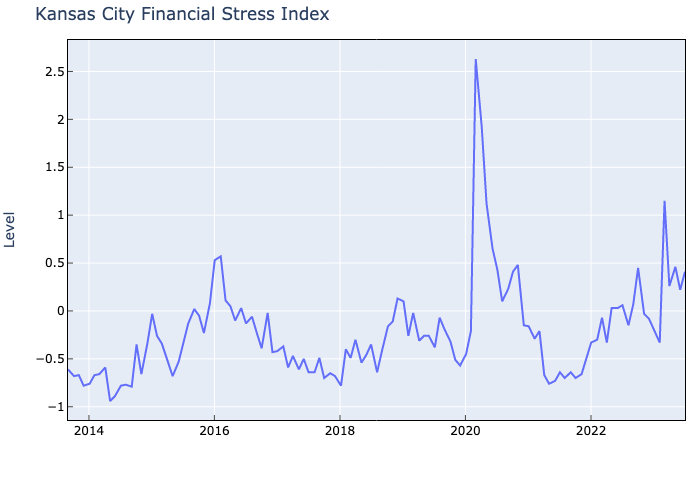

In [47]:
chartbook_panel('KCFSI')


ValueError: Could not save to JPEG for display

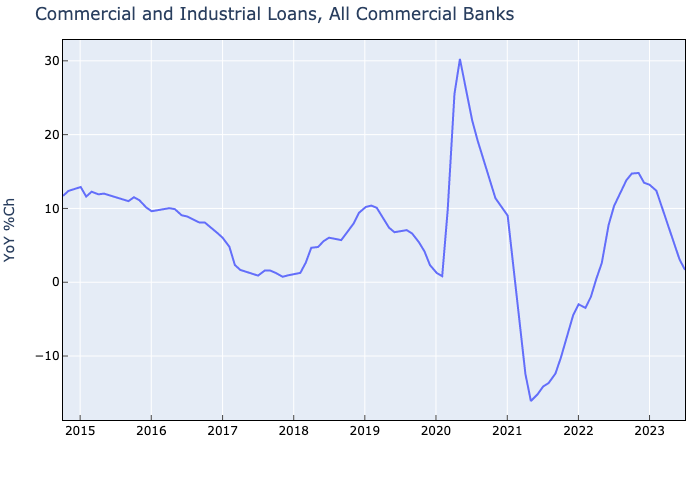

In [48]:
chartbook_panel('BUSLOANS')


# Labor Markets


ValueError: Could not save to JPEG for display

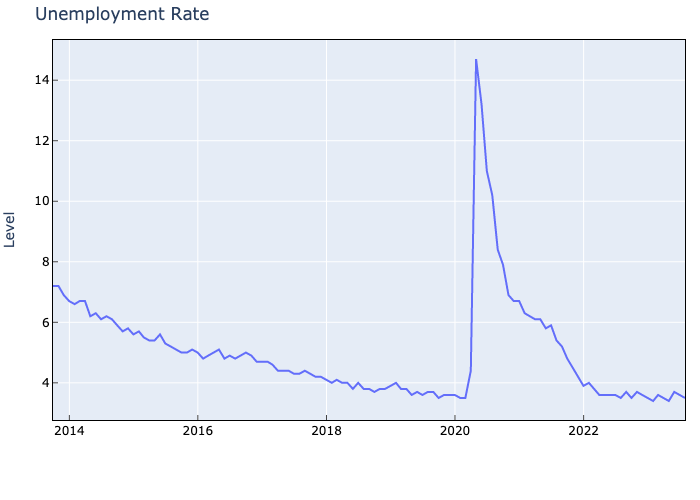

In [49]:
chartbook_panel('UNRATE')


ValueError: Could not save to JPEG for display

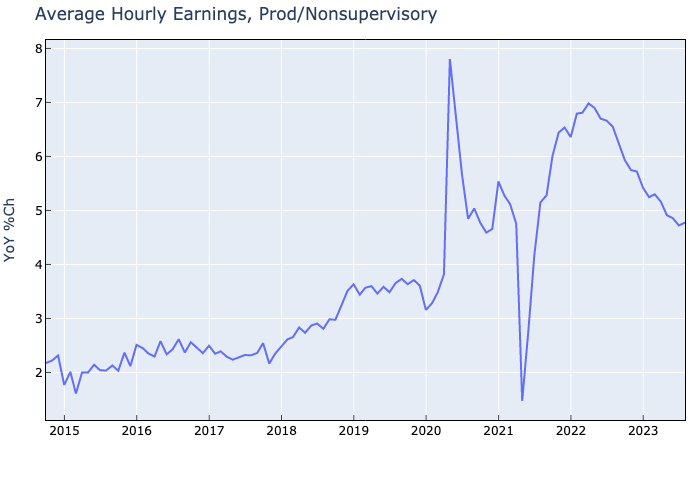

In [50]:
chartbook_panel('AHETPI')

ValueError: Could not save to JPEG for display

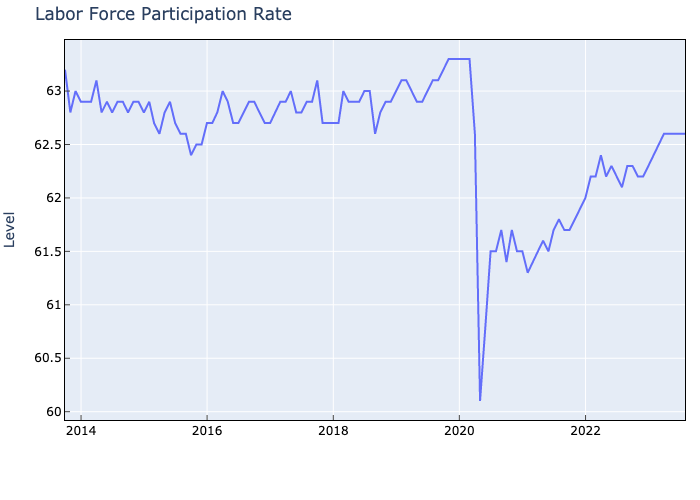

In [51]:
chartbook_panel('CIVPART')


ValueError: Could not save to JPEG for display

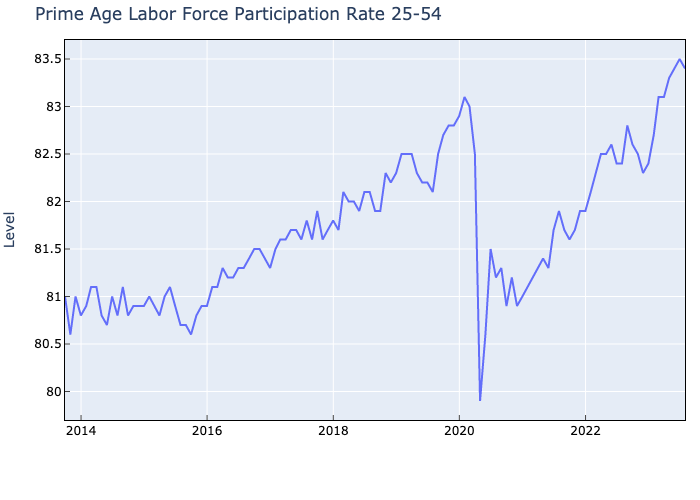

In [52]:
chartbook_panel('LNS11300060')


ValueError: Could not save to JPEG for display

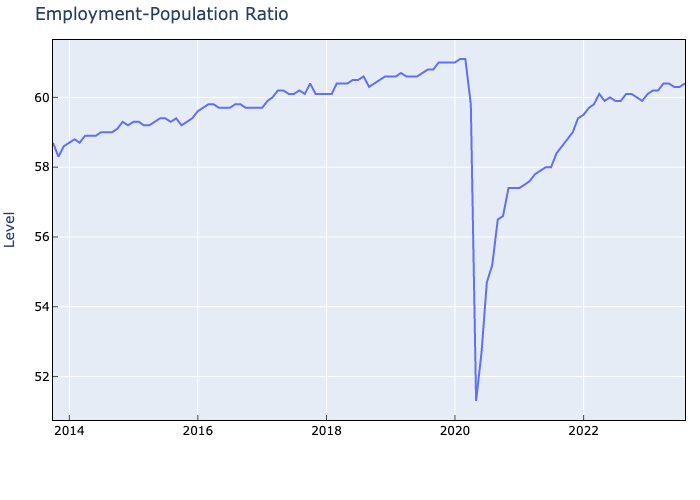

In [53]:
chartbook_panel('EMRATIO')


ValueError: Could not save to JPEG for display

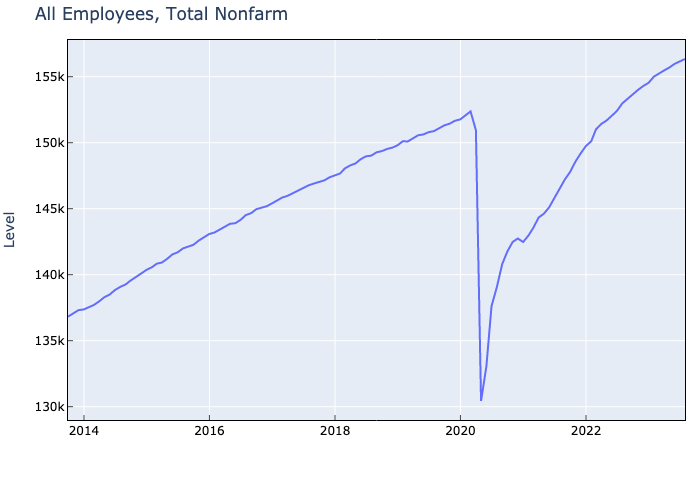

In [54]:
chartbook_panel('PAYEMS')


ValueError: Could not save to JPEG for display

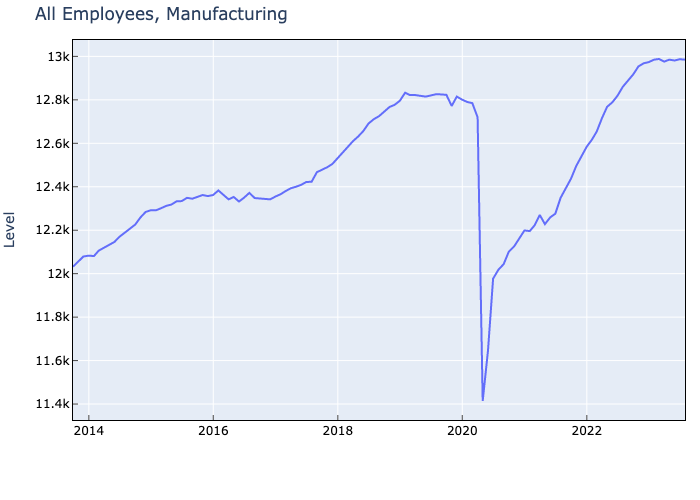

In [55]:
chartbook_panel('MANEMP')


ValueError: Could not save to JPEG for display

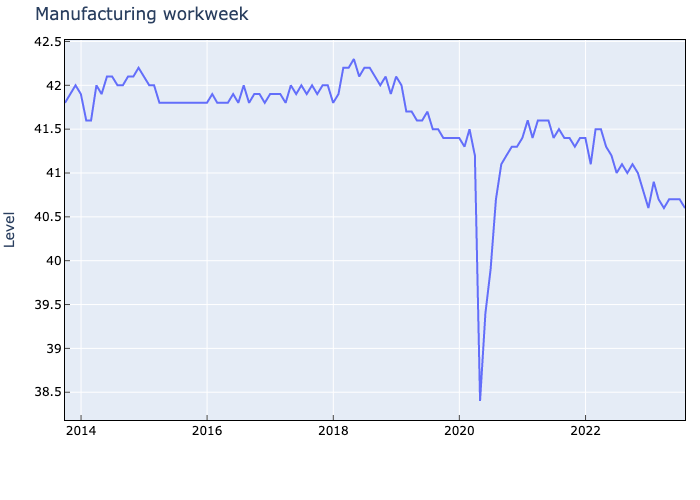

In [56]:
chartbook_panel('AWHMAN')


ValueError: Could not save to JPEG for display

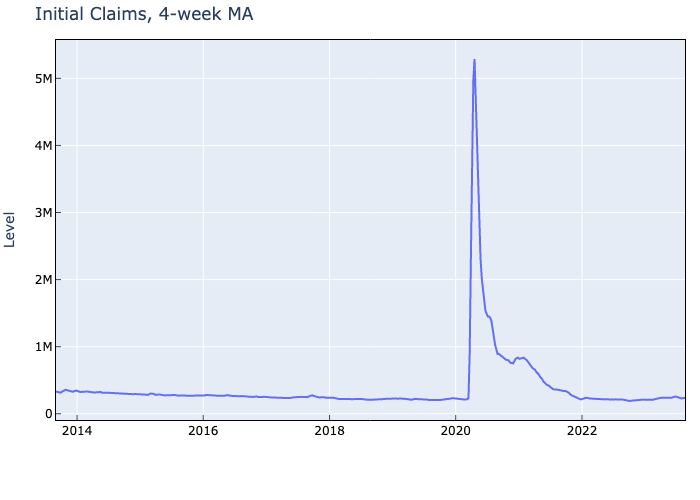

In [57]:
chartbook_panel('IC4WSA')


ValueError: Could not save to JPEG for display

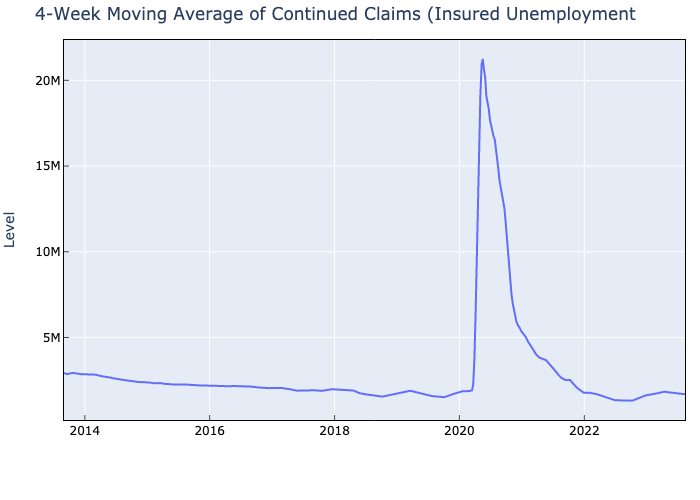

In [58]:
chartbook_panel('CC4WSA')


ValueError: Could not save to JPEG for display

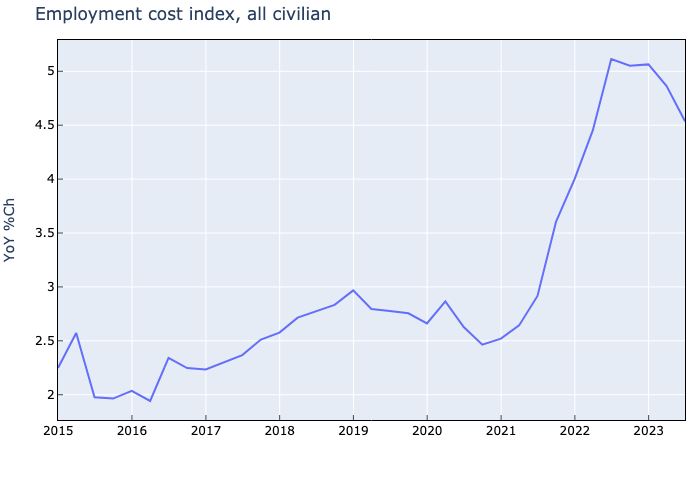

In [59]:
chartbook_panel('ECIALLCIV')


ValueError: Could not save to JPEG for display

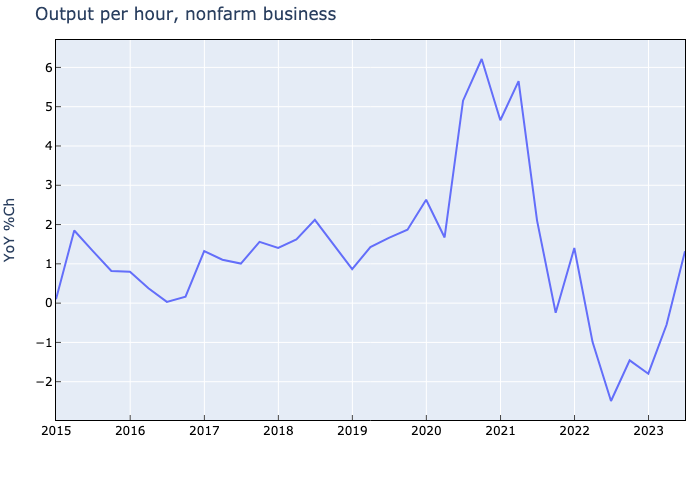

In [60]:
chartbook_panel('OPHNFB')


ValueError: Could not save to JPEG for display

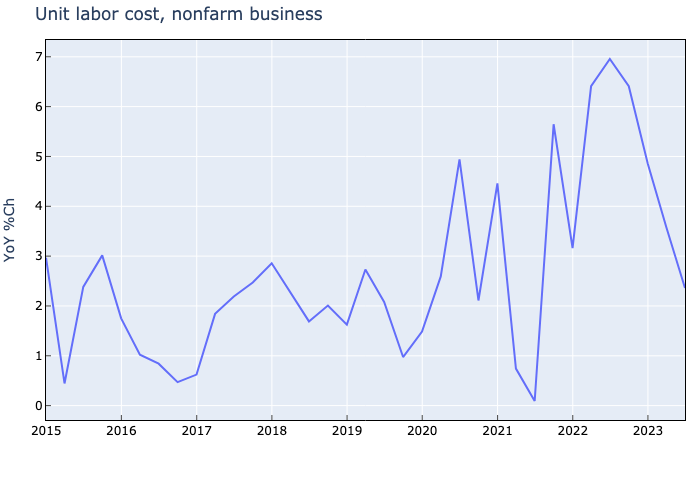

In [61]:
chartbook_panel('ULCNFB')


ValueError: Could not save to JPEG for display

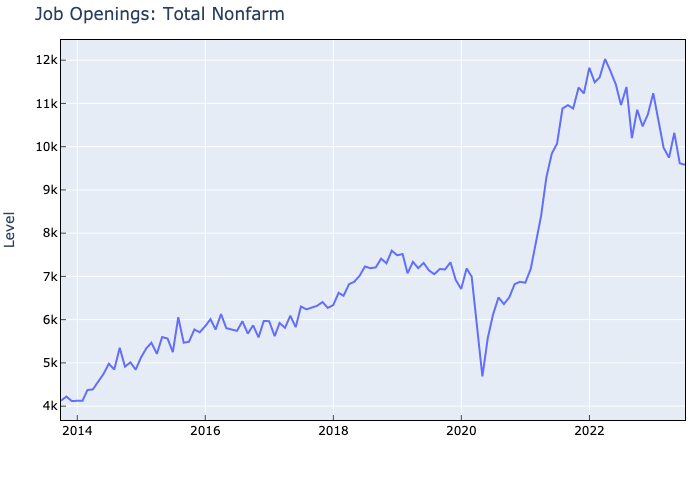

In [62]:
chartbook_panel('JTSJOL')


ValueError: Could not save to JPEG for display

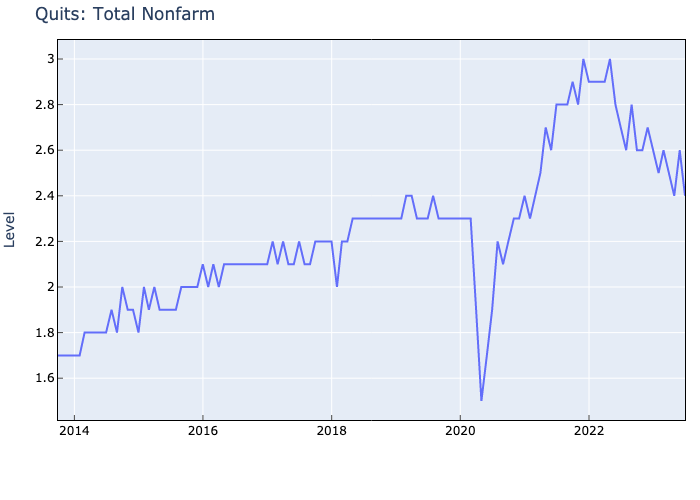

In [63]:
chartbook_panel('JTSQUR')


# Personal Income and Consumption

ValueError: Could not save to JPEG for display

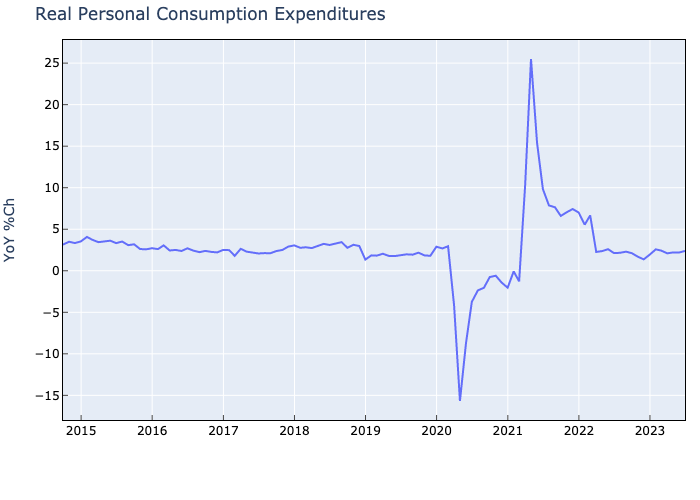

In [64]:
chartbook_panel('PCEC96')


ValueError: Could not save to JPEG for display

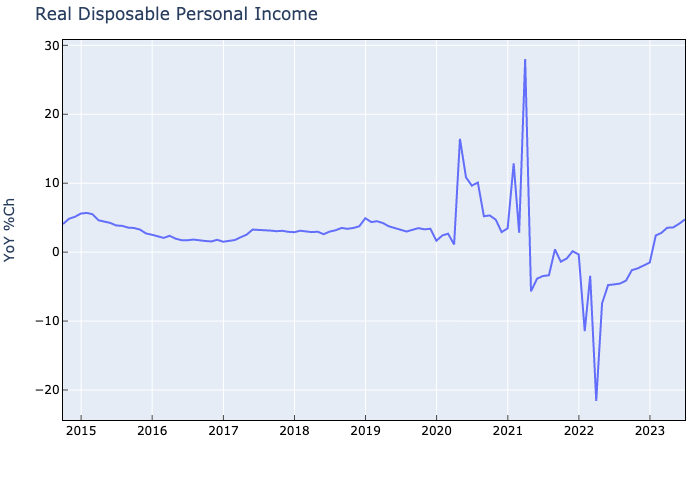

In [65]:
chartbook_panel('DSPIC96')


ValueError: Could not save to JPEG for display

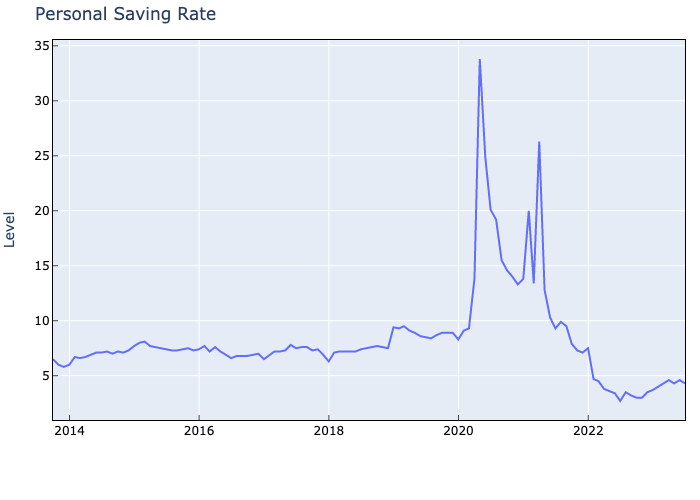

In [66]:
chartbook_panel('PSAVERT')


ValueError: Could not save to JPEG for display

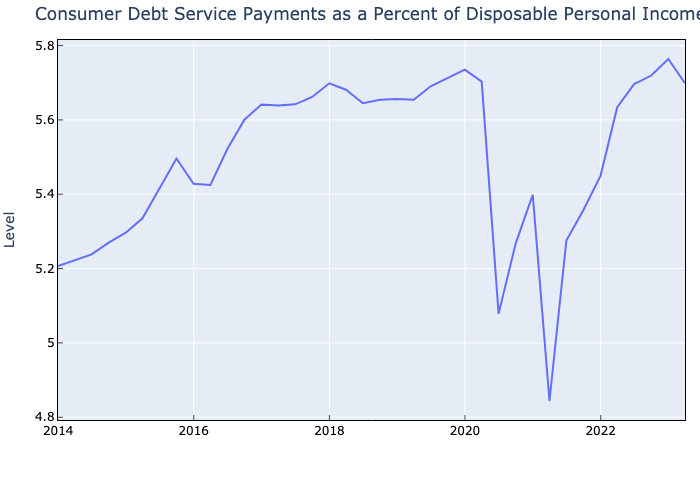

In [67]:
chartbook_panel('CDSP')


ValueError: Could not save to JPEG for display

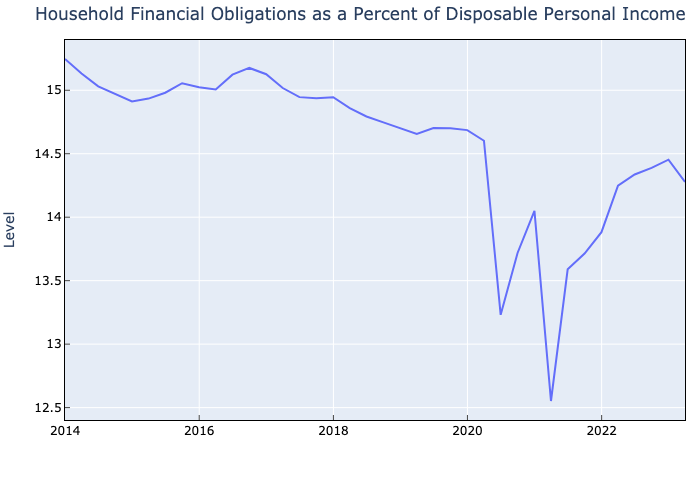

In [68]:
chartbook_panel('FODSP')


ValueError: Could not save to JPEG for display

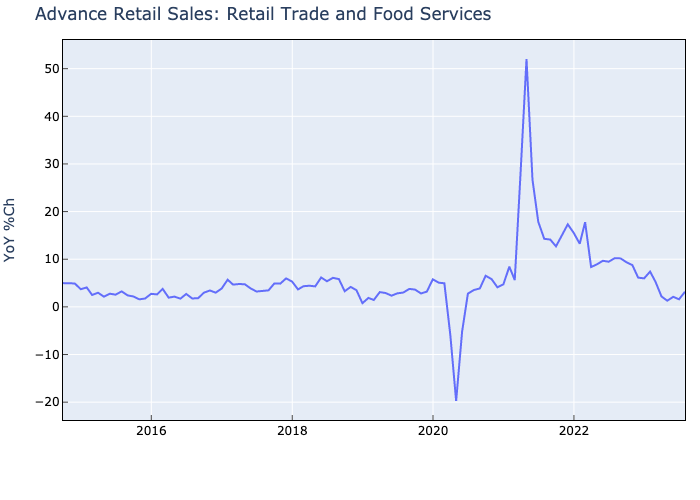

In [69]:
chartbook_panel('RSAFS')


ValueError: Could not save to JPEG for display

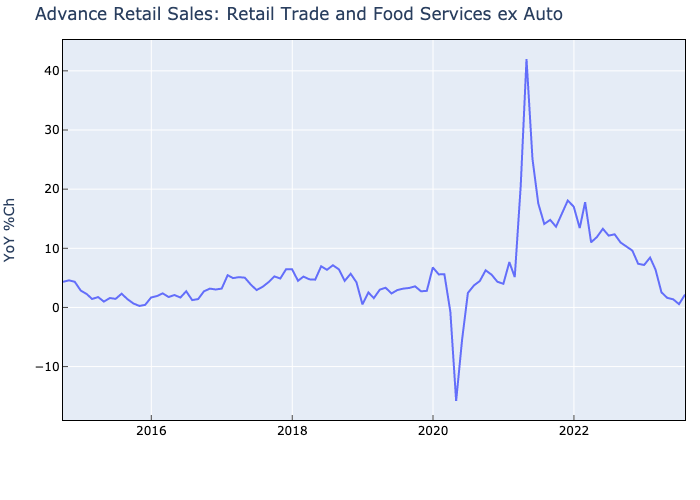

In [70]:
chartbook_panel('RSFSXMV')


ValueError: Could not save to JPEG for display

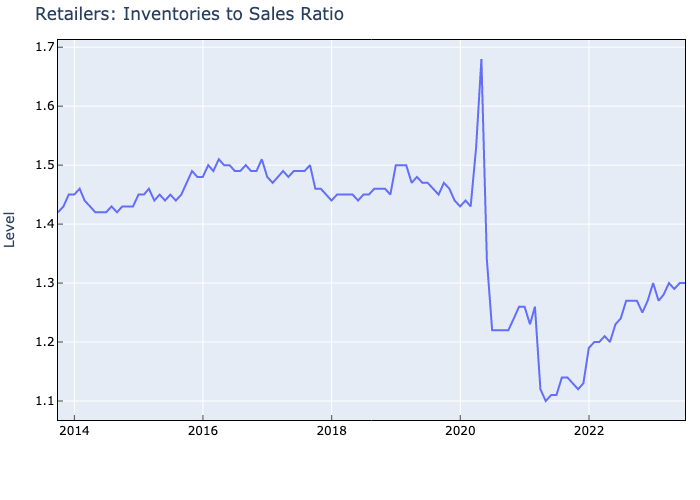

In [71]:
chartbook_panel('RETAILIRSA')


ValueError: Could not save to JPEG for display

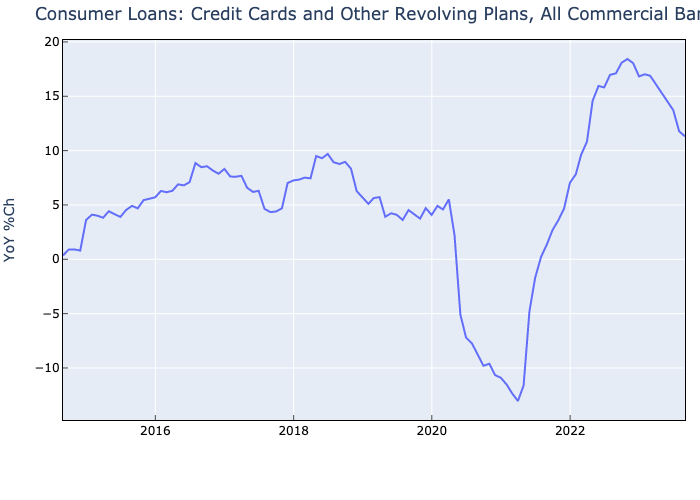

In [72]:
chartbook_panel('CCLACBW027SBOG')


ValueError: Could not save to JPEG for display

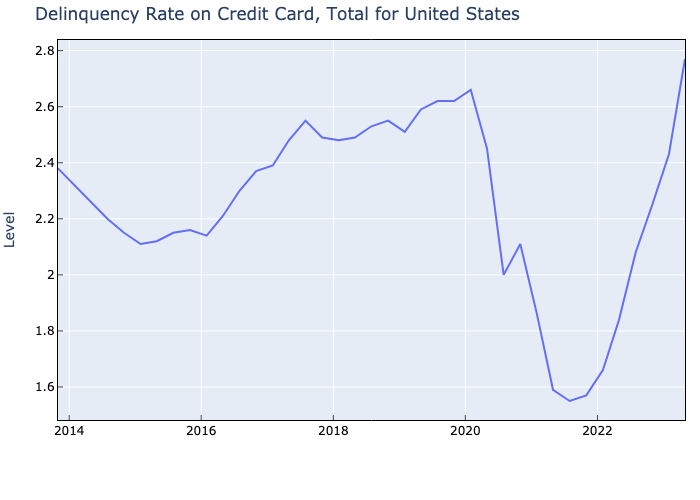

In [73]:
chartbook_panel('DRCCLACBS')

ValueError: Could not save to JPEG for display

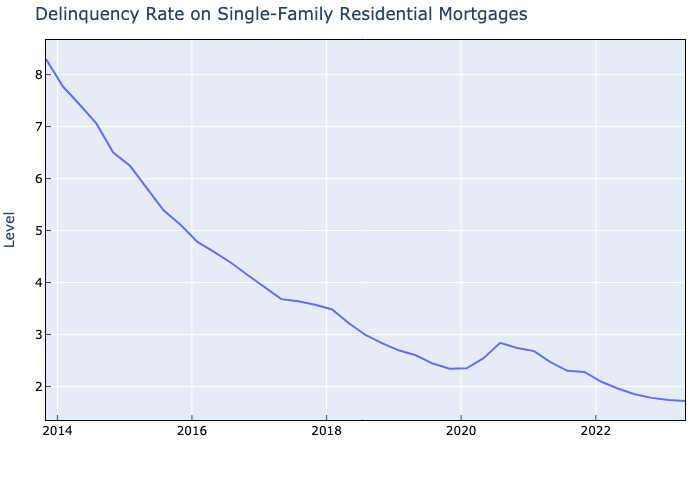

In [74]:
chartbook_panel('DRSFRMACBS')

ValueError: Could not save to JPEG for display

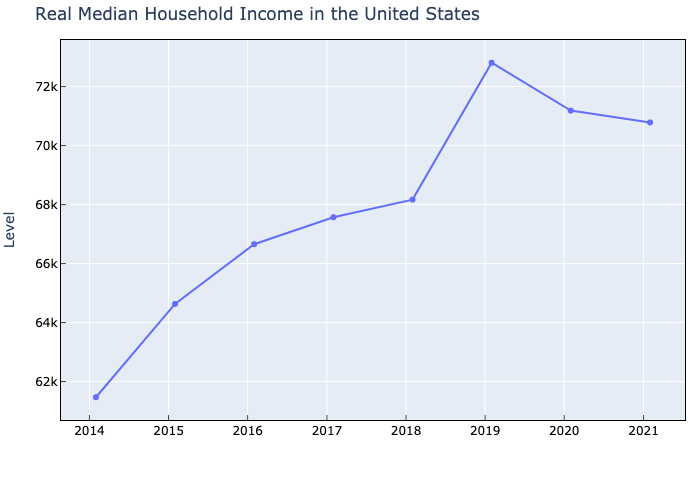

In [75]:
chartbook_panel('MEHOINUSA672N')

ValueError: Could not save to JPEG for display

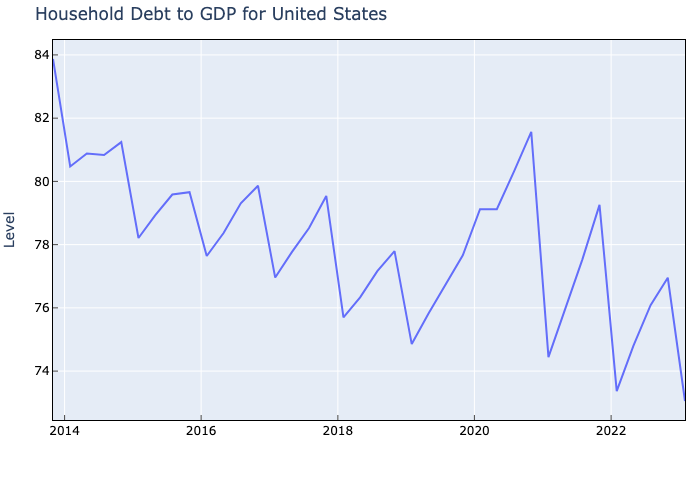

In [76]:
chartbook_panel('HDTGPDUSQ163N')

# Housing

ValueError: Could not save to JPEG for display

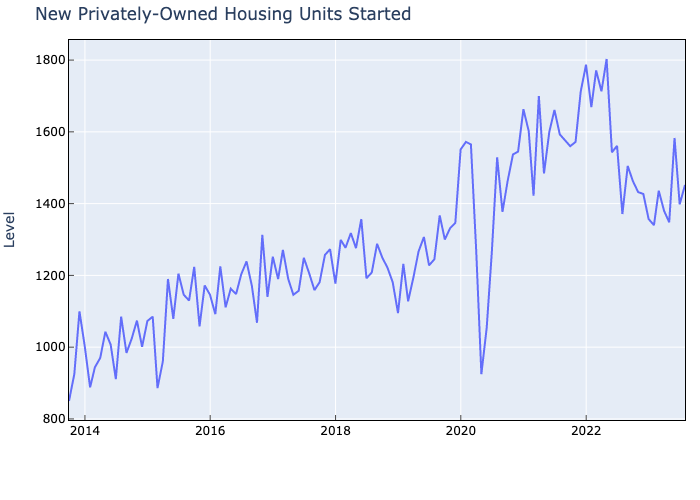

In [77]:
chartbook_panel('HOUST')

ValueError: Could not save to JPEG for display

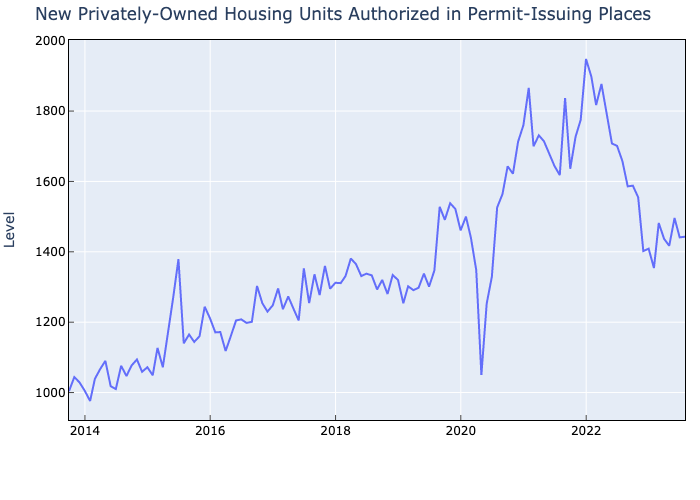

In [78]:
chartbook_panel('PERMIT')

ValueError: Could not save to JPEG for display

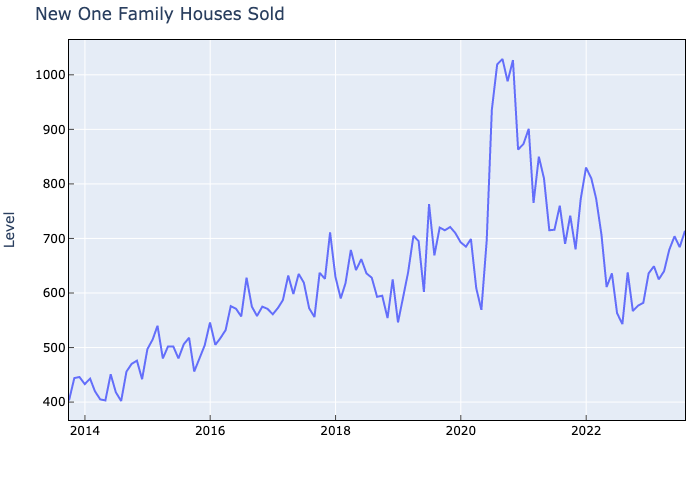

In [79]:
chartbook_panel('HSN1F')

ValueError: Could not save to JPEG for display

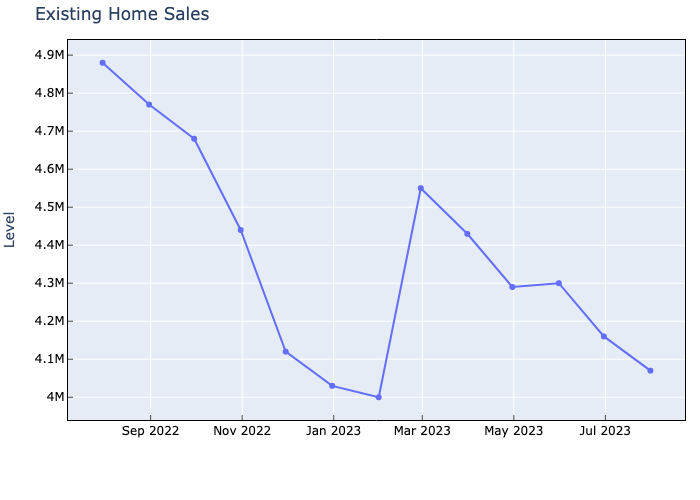

In [80]:
chartbook_panel('EXHOSLUSM495S')

ValueError: Could not save to JPEG for display

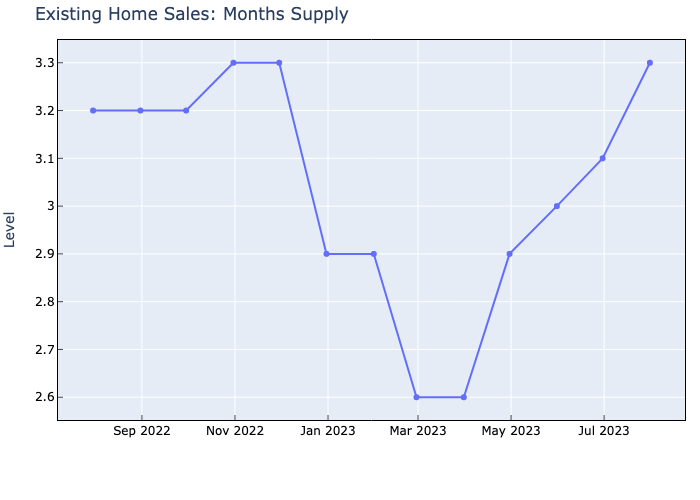

In [81]:
chartbook_panel('HOSSUPUSM673N')

ValueError: Could not save to JPEG for display

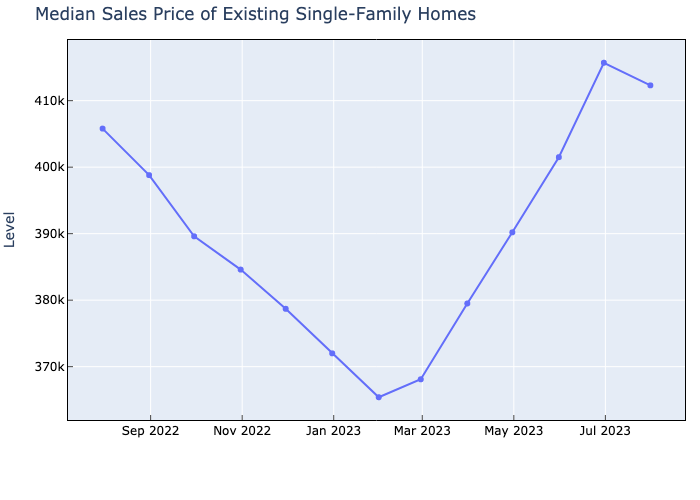

In [82]:
chartbook_panel('HSFMEDUSM052N')

ValueError: Could not save to JPEG for display

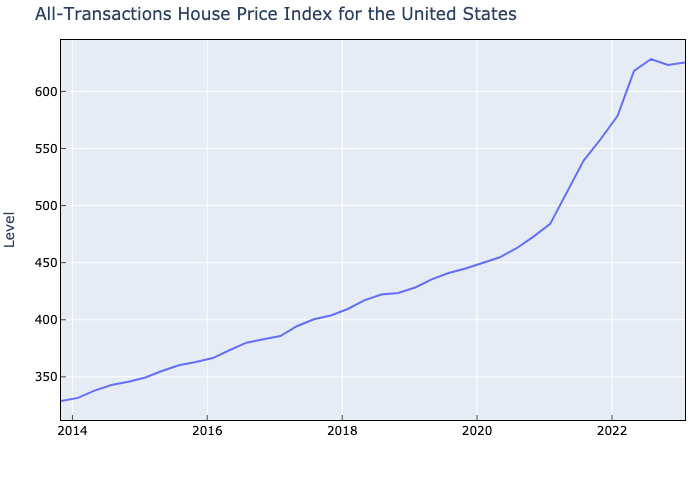

In [83]:
chartbook_panel('USSTHPI')

ValueError: Could not save to JPEG for display

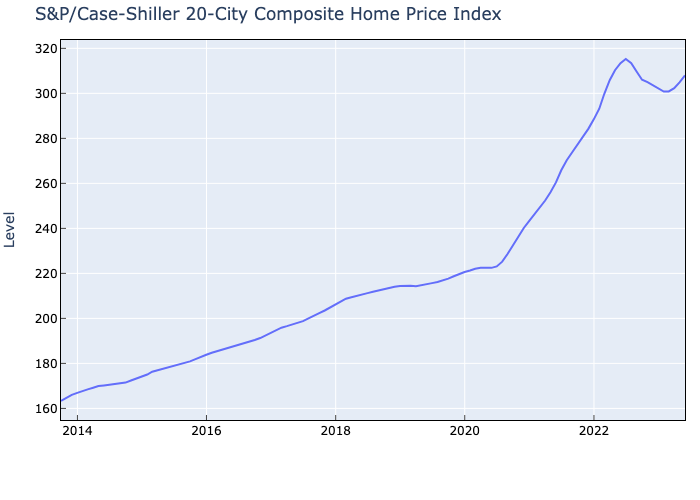

In [84]:
chartbook_panel('SPCS20RSA')

ValueError: Could not save to JPEG for display

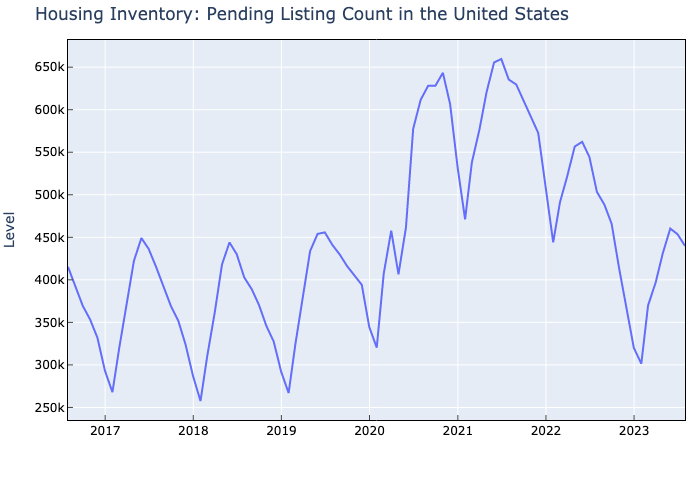

In [85]:
chartbook_panel('PENLISCOUUS')

ValueError: Could not save to JPEG for display

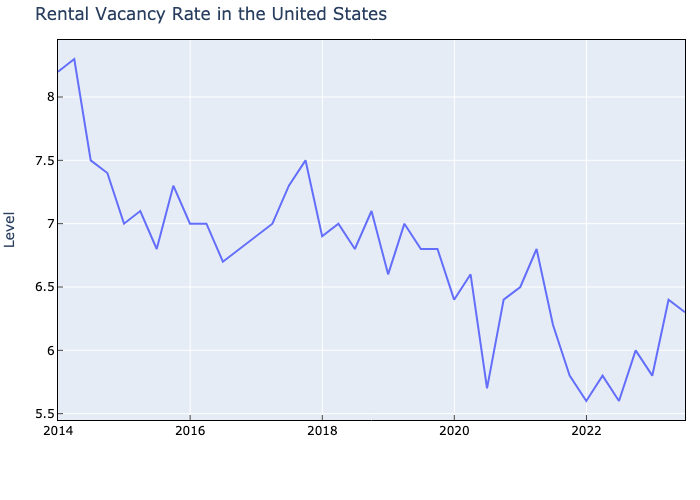

In [86]:
chartbook_panel('RRVRUSQ156N')

# Manufacturing

ValueError: Could not save to JPEG for display

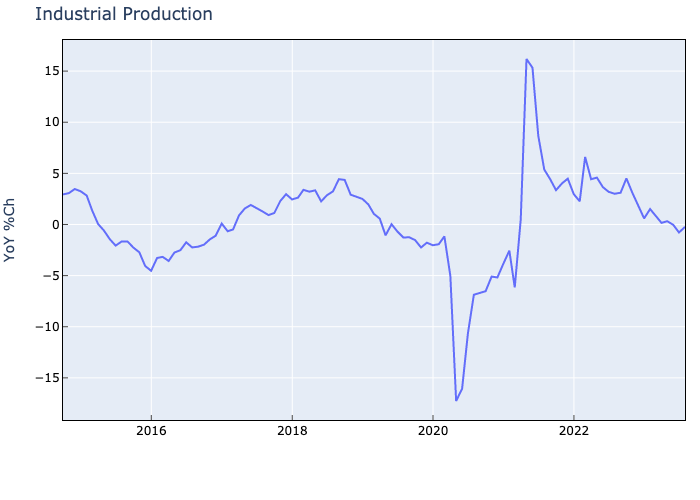

In [87]:
chartbook_panel('INDPRO')

ValueError: Could not save to JPEG for display

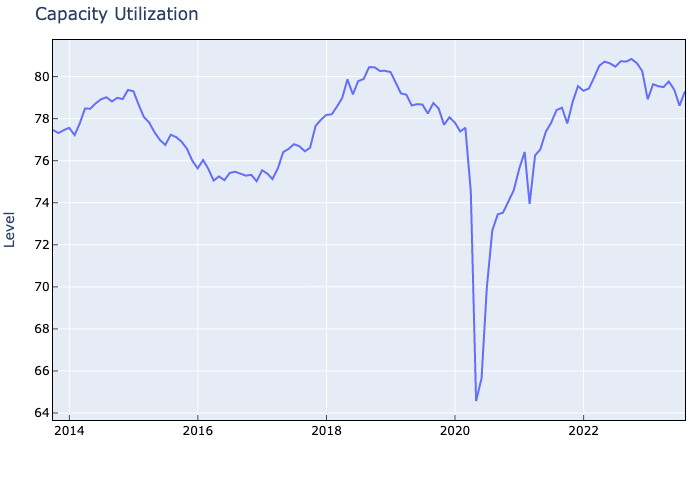

In [88]:
chartbook_panel('TCU')

ValueError: Could not save to JPEG for display

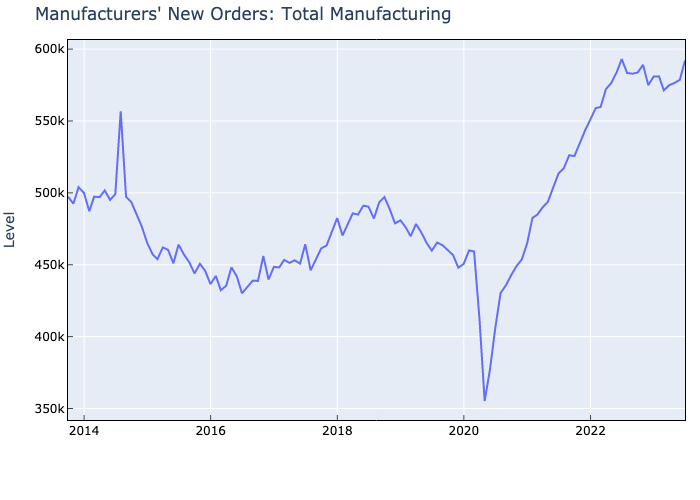

In [89]:
chartbook_panel('AMTMNO')

ValueError: Could not save to JPEG for display

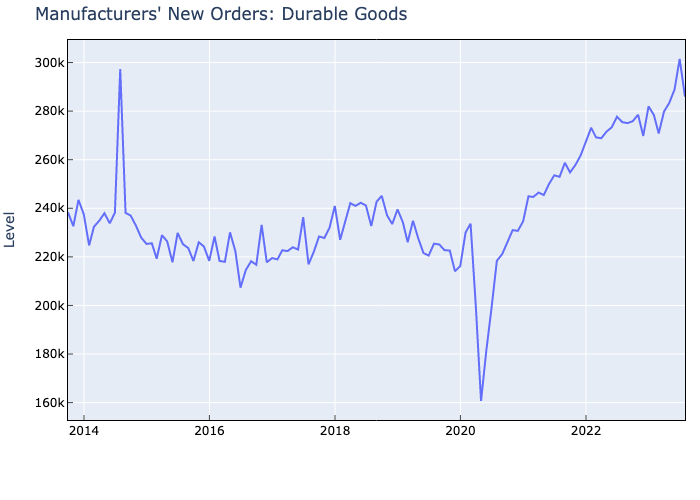

In [90]:
chartbook_panel('DGORDER')

ValueError: Could not save to JPEG for display

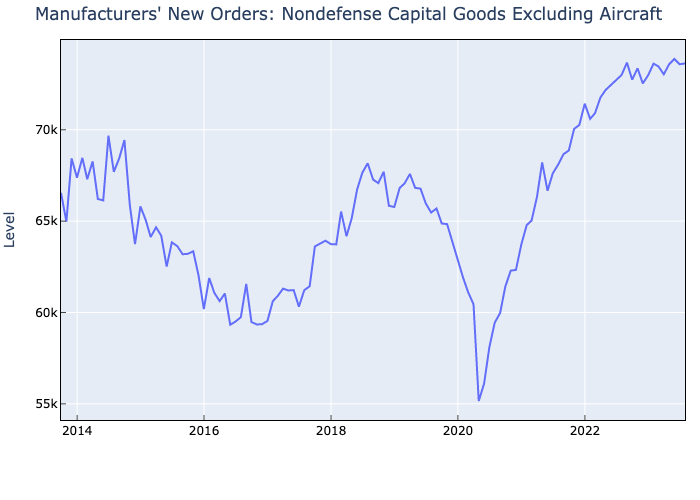

In [91]:
chartbook_panel('NEWORDER')

ValueError: Could not save to JPEG for display

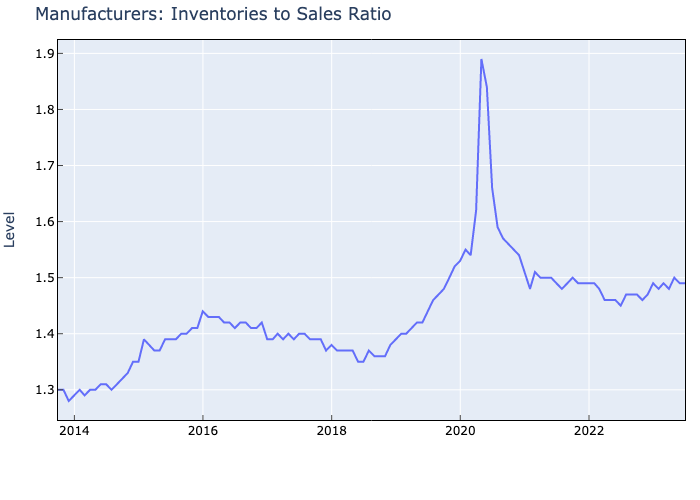

In [92]:
chartbook_panel('MNFCTRIRSA')

ValueError: Could not save to JPEG for display

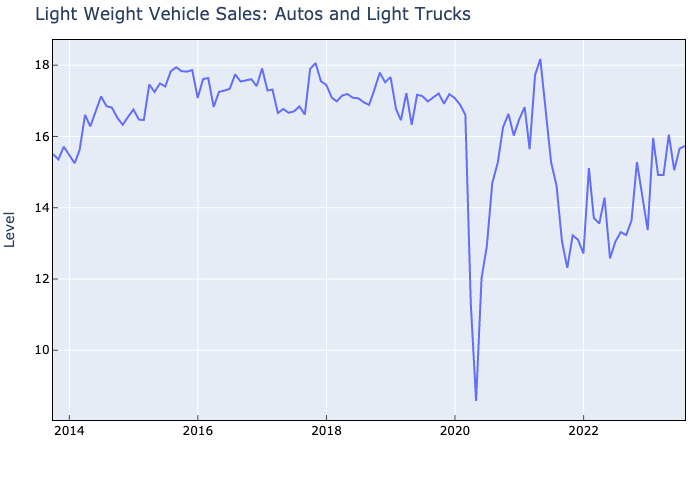

In [93]:
chartbook_panel('ALTSALES')

ValueError: Could not save to JPEG for display

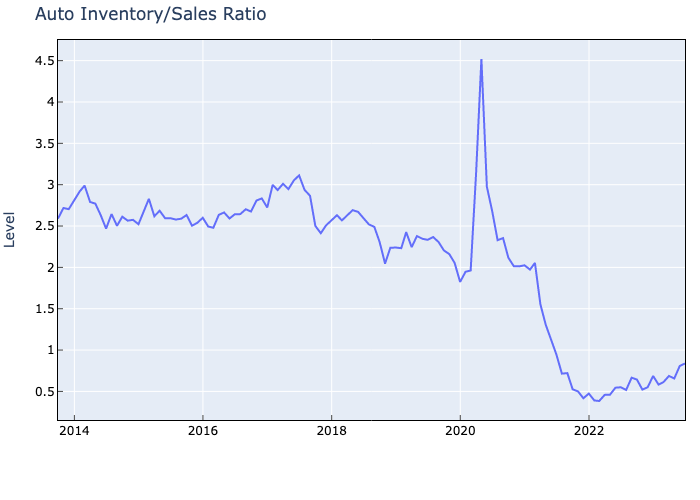

In [94]:
chartbook_panel('AISRSA')

# Government


ValueError: Could not save to JPEG for display

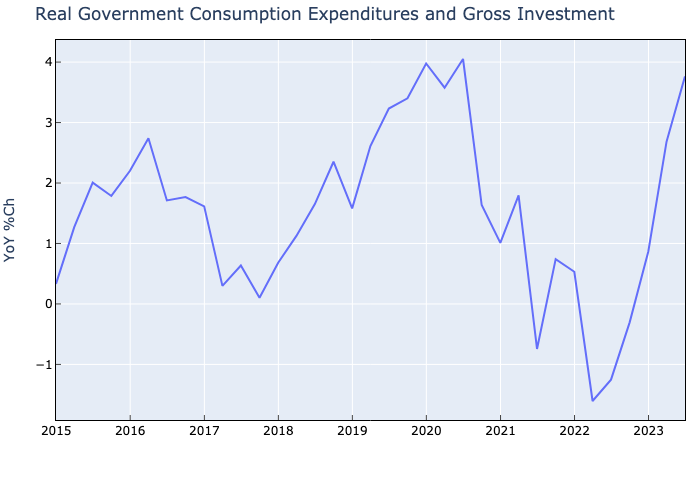

In [95]:
chartbook_panel('GCEC1')

ValueError: Could not save to JPEG for display

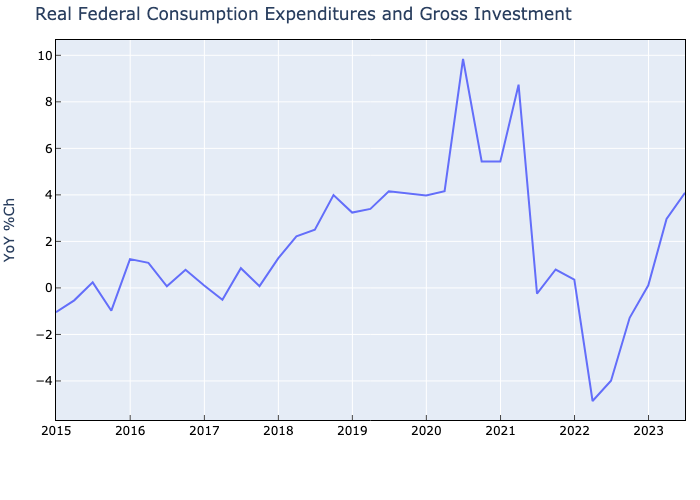

In [96]:
chartbook_panel('FGCEC1')

ValueError: Could not save to JPEG for display

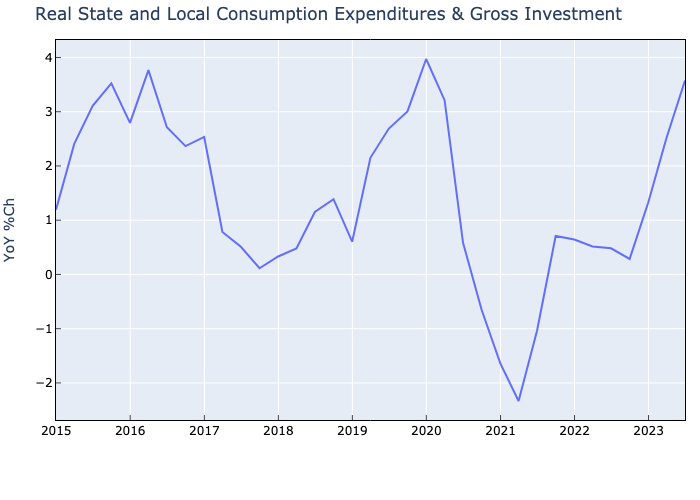

In [97]:
chartbook_panel('SLCEC1')


ValueError: Could not save to JPEG for display

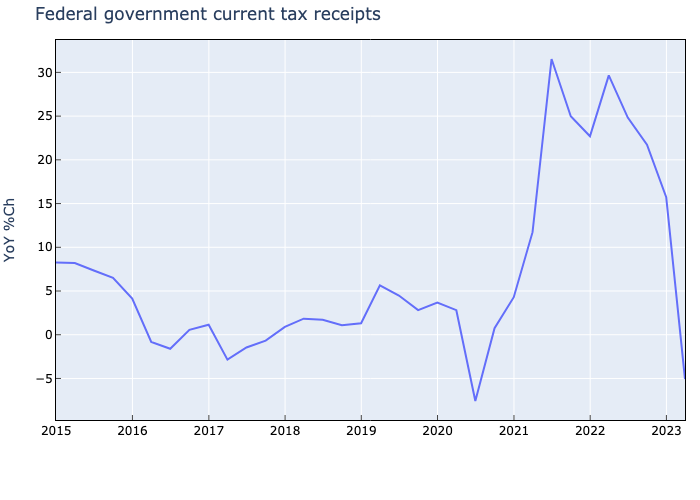

In [98]:
chartbook_panel('W006RC1Q027SBEA')

ValueError: Could not save to JPEG for display

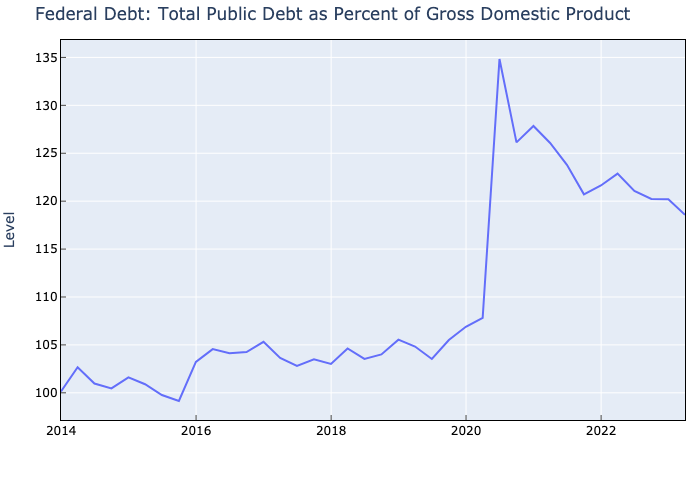

In [99]:
chartbook_panel('GFDEGDQ188S')

ValueError: Could not save to JPEG for display

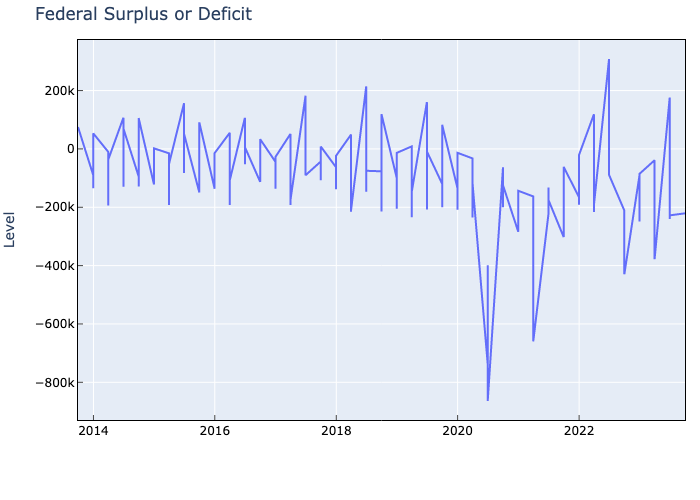

In [100]:
chartbook_panel('MTSDS133FMS')

# External


ValueError: Could not save to JPEG for display

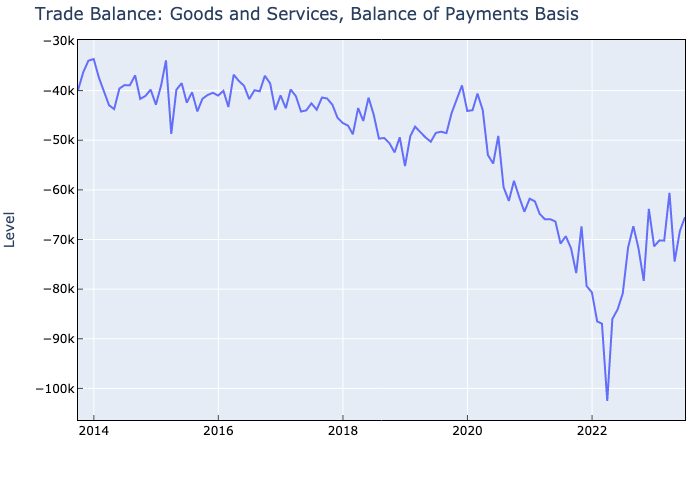

In [101]:
chartbook_panel('BOPGSTB')

ValueError: Could not save to JPEG for display

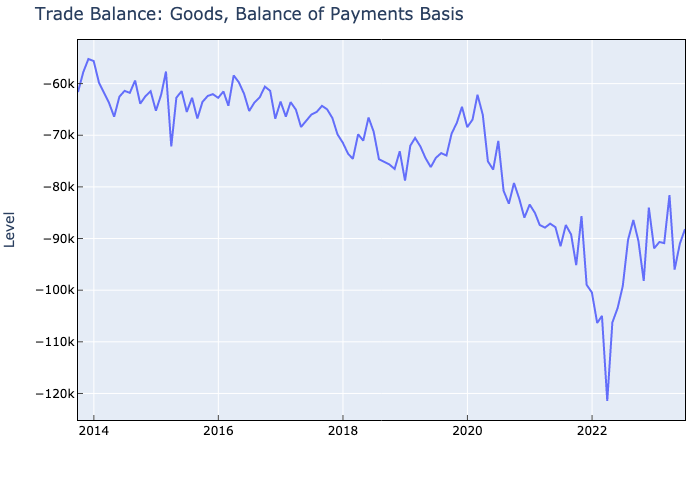

In [102]:
chartbook_panel('BOPGTB')

ValueError: Could not save to JPEG for display

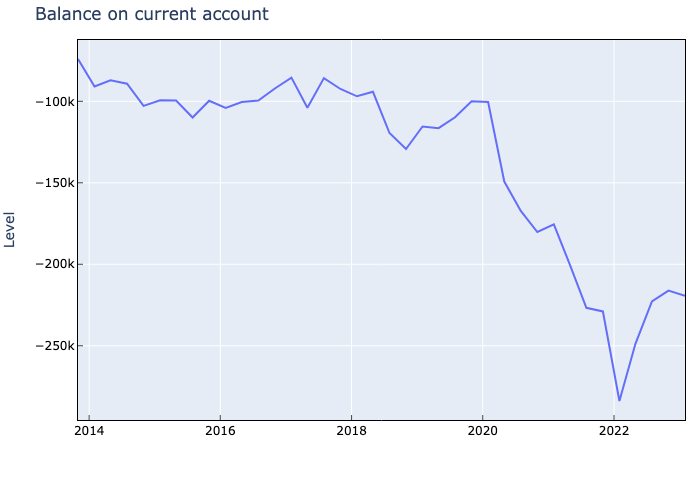

In [103]:
chartbook_panel('IEABC')

ValueError: Could not save to JPEG for display

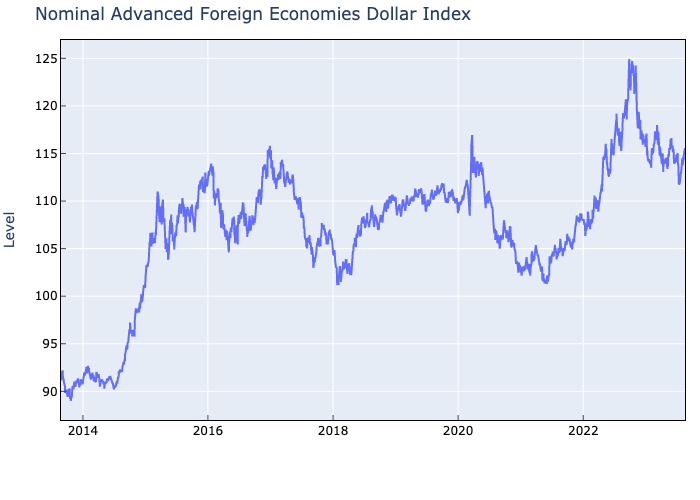

In [104]:
chartbook_panel('DTWEXAFEGS')

ValueError: Could not save to JPEG for display

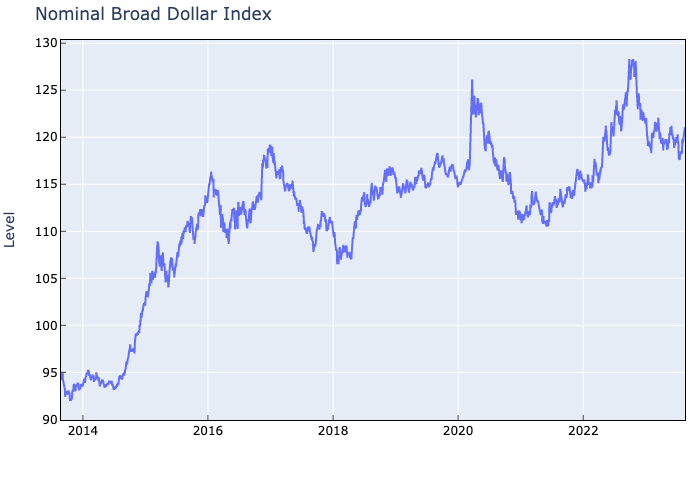

In [105]:
chartbook_panel('DTWEXBGS')

ValueError: Could not save to JPEG for display

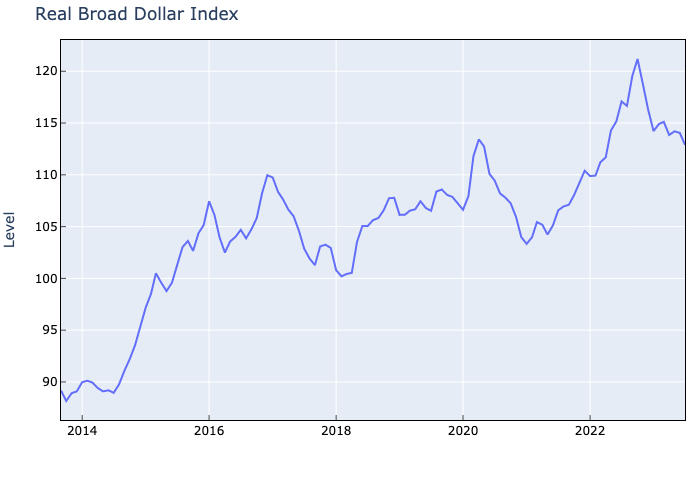

In [106]:
chartbook_panel('RTWEXBGS')

ValueError: Could not save to JPEG for display

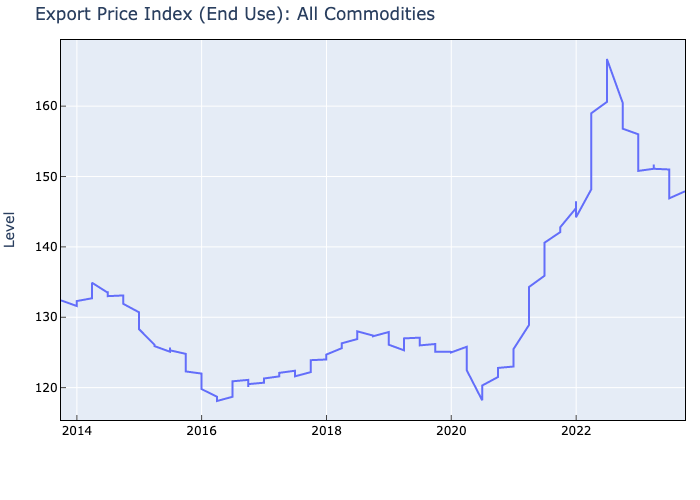

In [107]:
chartbook_panel('IQ')

ValueError: Could not save to JPEG for display

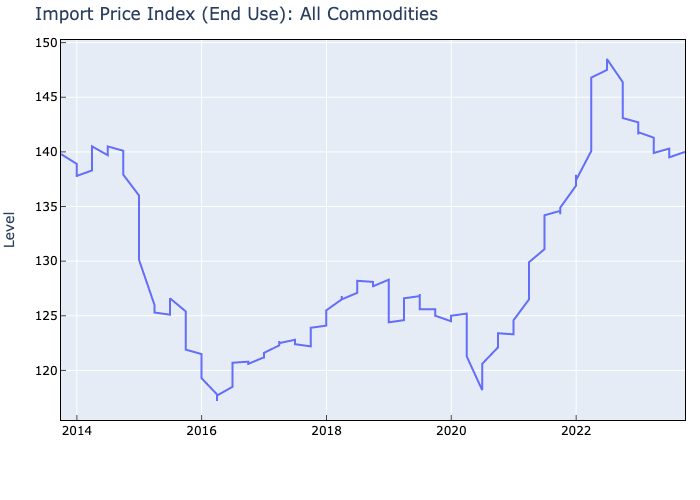

In [108]:
chartbook_panel('IR')

# Surveys

ValueError: Could not save to JPEG for display

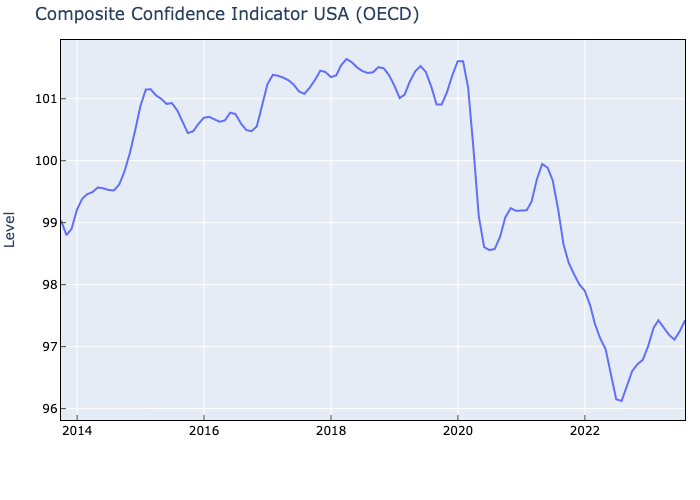

In [109]:
chartbook_panel('CSCICP03USM665S')

ValueError: Could not save to JPEG for display

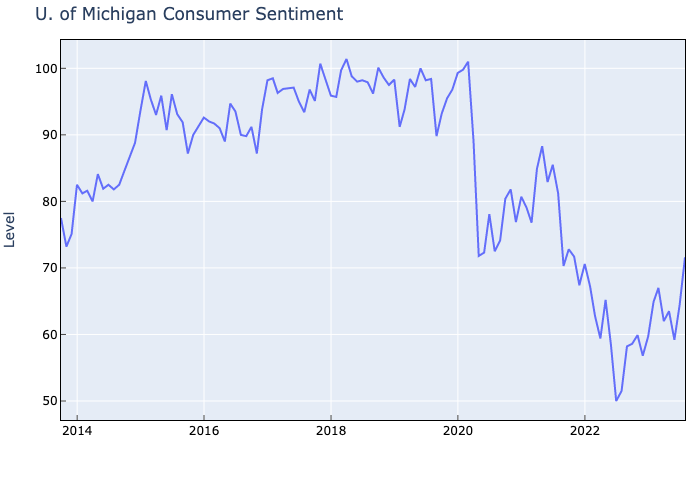

In [110]:
chartbook_panel('UMCSENT')

ValueError: Could not save to JPEG for display

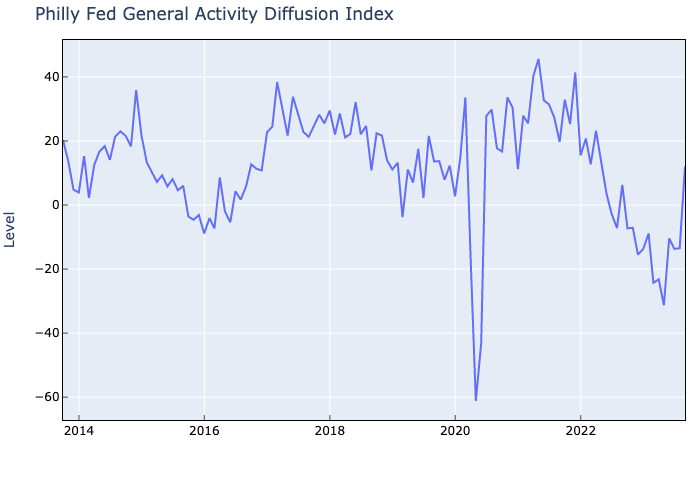

In [111]:
chartbook_panel('GACDFSA066MSFRBPHI')

ValueError: Could not save to JPEG for display

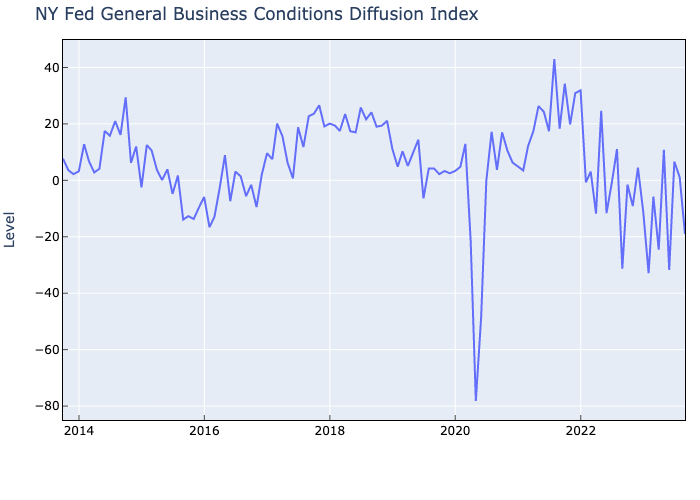

In [112]:
chartbook_panel('GACDISA066MSFRBNY')

ValueError: Could not save to JPEG for display

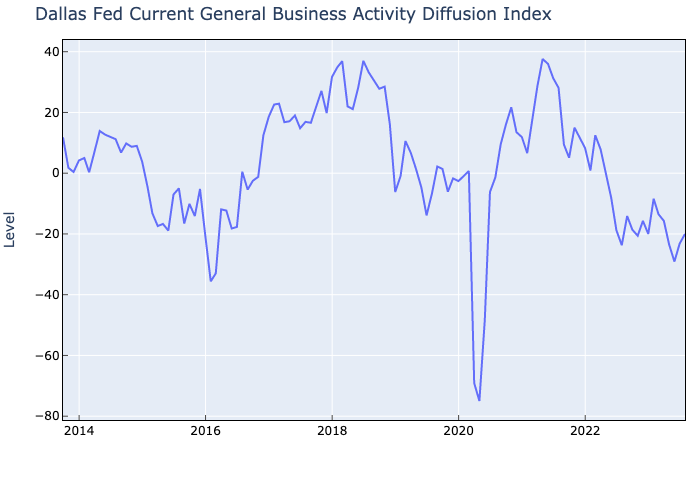

In [113]:
chartbook_panel('BACTSAMFRBDAL')

ValueError: Could not save to JPEG for display

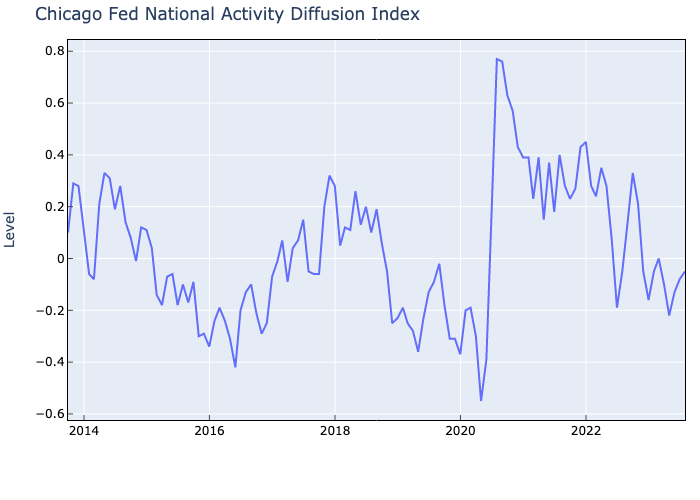

In [114]:
chartbook_panel('CFNAIDIFF')

ValueError: Could not save to JPEG for display

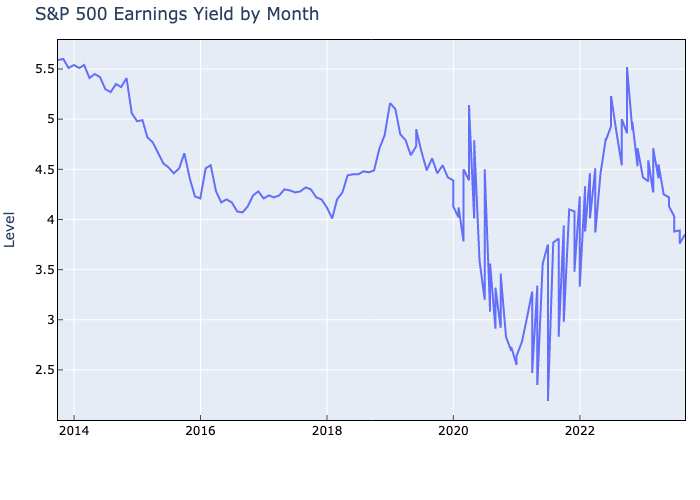

In [115]:
chartbook_panel('MULTPL_SP500_EARNINGS_YIELD_MONTH')

ValueError: Could not save to JPEG for display

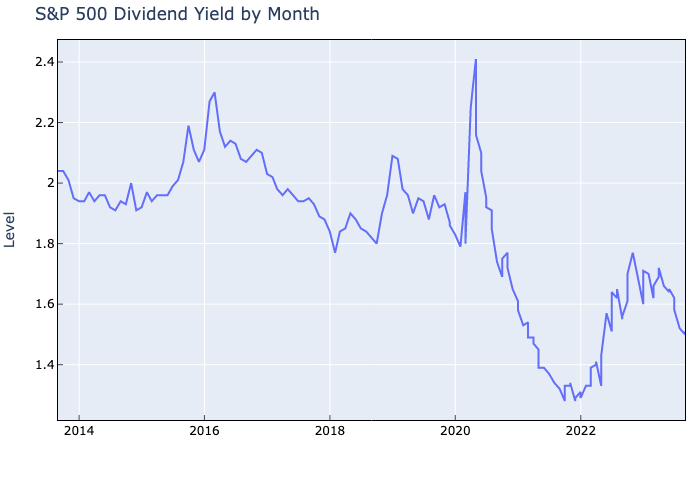

In [116]:
chartbook_panel('MULTPL_SP500_DIV_YIELD_MONTH')

ValueError: Could not save to JPEG for display

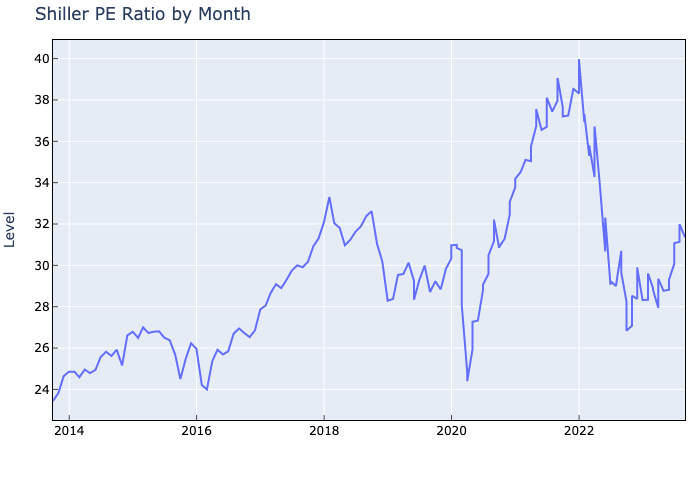

In [117]:
chartbook_panel('MULTPL_SHILLER_PE_RATIO_MONTH')

In [118]:
fred = Fred(api_key=os.environ["FRED_API_KEY"])
data = fred.get_series('SP500')
data

2013-08-26    1656.78
2013-08-27    1630.48
2013-08-28    1634.96
2013-08-29    1638.17
2013-08-30    1632.97
               ...   
2023-08-21    4399.77
2023-08-22    4387.55
2023-08-23    4436.01
2023-08-24    4376.31
2023-08-25    4405.71
Length: 2610, dtype: float64

In [119]:
info = fred.get_series_info('AHETPI')
print(info.title)
print(info.notes)
info

Average Hourly Earnings of Production and Nonsupervisory Employees, Total Private
Production and related employees include working supervisors and all nonsupervisory employees (including group leaders and trainees) engaged in fabricating, processing, assembling, inspecting, receiving, storing, handling, packing, warehousing, shipping, trucking, hauling, maintenance, repair, janitorial, guard services, product development, auxiliary production for plant's own use (for example, power plant), recordkeeping, and other services closely associated with the above production operations. #Nonsupervisory employees include those individuals in private, service-providing industries who are not above the working-supervisor level. This group includes individuals such as office and clerical workers, repairers, salespersons, operators, drivers, physicians, lawyers, accountants, nurses, social workers, research aides, teachers, drafters, photographers, beauticians, musicians, restaurant workers, custod

id                                                                      AHETPI
realtime_start                                                      2023-08-26
realtime_end                                                        2023-08-26
title                        Average Hourly Earnings of Production and Nons...
observation_start                                                   1964-01-01
observation_end                                                     2023-07-01
frequency                                                              Monthly
frequency_short                                                              M
units                                                         Dollars per Hour
units_short                                                         $ per Hour
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [120]:
info = fred.get_series_info('PAYEMS')


In [135]:
base_url = "https://api.stlouisfed.org/fred"
key = f"?api_key={os.environ['FRED_API_KEY']}"
response = requests.get(f"{base_url}/releases{key}")

soup = BeautifulSoup(response.content, features="xml")

ids, links, names, notes, real_time_ends, sources = [], [], [], [], [], []
source_dict = {}
for ob in soup.find_all("release"):
    ids.append(ob.get('id'))
    links.append(ob.get('link'))
    names.append(ob.get('name'))
    notes.append(ob.get('notes'))
    real_time_ends.append(ob.get('realtime_end'))
    release_id = ob.get('id')
    source_url = f"{base_url}/release/sources?release_id={release_id}&api_key={os.environ['FRED_API_KEY']}"
    source_response = requests.get(source_url)
    source_ids = []
    if source_response:
f    sources.append(source_ids)

release_df = pd.DataFrame({'id': ids,
              'name': names,
              'link': links,
              'notes': notes,
              'real_time_end': real_time_ends,
              'source': sources
             })
release_df = release_df.set_index("id")
release_df


ValueError: All arrays must be of the same length

In [137]:
INDICATORS['FRED']

{'AHETPI': {'freq': 'M',
  'title': 'Average Hourly Earnings, Prod/Nonsupervisory',
  'transform': 'YOY',
  'indicator': 'AHETPI',
  'df':             AHETPI
  DATE              
  2013-09-01   20.23
  2013-10-01   20.25
  2013-11-01   20.30
  2013-12-01   20.35
  2014-01-01   20.39
  ...            ...
  2023-03-01   28.52
  2023-04-01   28.61
  2023-05-01   28.72
  2023-06-01   28.83
  2023-07-01   28.96
  
  [119 rows x 1 columns]},
 'AISRSA': {'freq': 'M',
  'title': 'Auto Inventory/Sales Ratio',
  'indicator': 'AISRSA',
  'df':             AISRSA
  DATE              
  2013-09-01   2.590
  2013-10-01   2.718
  2013-11-01   2.704
  2013-12-01   2.812
  2014-01-01   2.918
  ...            ...
  2023-02-01   0.613
  2023-03-01   0.687
  2023-04-01   0.656
  2023-05-01   0.807
  2023-06-01   0.838
  
  [118 rows x 1 columns]},
 'ALTSALES': {'freq': 'M',
  'title': 'Light Weight Vehicle Sales: Autos and Light Trucks',
  'indicator': 'ALTSALES',
  'df':             ALTSALES
  DATE      

In [ ]:
source_df = pd.DataFrame({'id': source_dict.keys(),
              'name': source_dict.items()})
source_df['id'] = source_df['id'].astype(int)
source_df['name'] = source_df['name'].apply(lambda t: t[1])
source_df = source_df.sort_values('id')
source_df = source_df.set_index('id')
source_df

In [ ]:
release_id = 9
tag_url = f"{base_url}/release/tags?release_id={release_id}&api_key={os.environ['FRED_API_KEY']}&order_by=popularity"
tag_response = requests.get(tag_url)
tag_soup = BeautifulSoup(tag_response.content, features="xml")
for tag in tag_soup.find_all("tag"):
    print(tag['name'])


In [ ]:
INDICATORS['FRED']

In [ ]:
# related tags
release_id = 9
tag_url = f"{base_url}/release/related_tags?release_id={release_id}&tag_names=retail&api_key={os.environ['FRED_API_KEY']}&order_by=popularity"
tag_response = requests.get(tag_url)
tag_soup = BeautifulSoup(tag_response.content, features="xml")
for tag in tag_soup.find_all("tag"):
    print(tag['name'])


In [142]:
from functools import cache
@cache
def get_cat_by_id(cat_id):
    cat_url = f"{base_url}/category?category_id={cat_id}&api_key={os.environ['FRED_API_KEY']}"
    print(cat_url)
    cat_response = requests.get(cat_url)
    print(cat_response.content)
    cat_soup=BeautifulSoup(cat_response.content, features='xml')
    retarray = [{'id': cat.get('id'),
                  'name': cat.get('name'),
                  'notes': cat.get('notes'),
                  'parent_id': cat.get('parent_id')} for cat in cat_soup.find_all("category")]
        
    return retarray

get_cat_by_id('32991')


b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n<category id="32991" name="Money, Banking, &amp; Finance" parent_id="0"/>\n</categories>'


[{'id': '32991',
  'name': 'Money, Banking, & Finance',
  'notes': None,
  'parent_id': '0'}]

In [145]:
from functools import cache
@cache
def get_cat_children(cat_id):
    cat_url = f"{base_url}/category/children?category_id={cat_id}&api_key={os.environ['FRED_API_KEY']}"
    cat_response = requests.get(cat_url)
    print(cat_response.content)
    cat_soup=BeautifulSoup(cat_response.content, features='xml')
    retarray = [{'id': cat.get('id'),
                  'name': cat.get('name'),
                  'notes': cat.get('notes'),
                  'parent_id': cat.get('parent_id')} for cat in cat_soup.find_all("category")]
        
    return retarray

get_cat_children('0')


b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n  <category id="32991" name="Money, Banking, &amp; Finance" parent_id="0"/>\n  <category id="10" name="Population, Employment, &amp; Labor Markets" parent_id="0"/>\n  <category id="32992" name="National Accounts" parent_id="0"/>\n  <category id="1" name="Production &amp; Business Activity" parent_id="0"/>\n  <category id="32455" name="Prices" parent_id="0"/>\n  <category id="32263" name="International Data" parent_id="0"/>\n  <category id="3008" name="U.S. Regional Data" parent_id="0"/>\n  <category id="33060" name="Academic Data" parent_id="0"/>\n</categories>'


[{'id': '32991',
  'name': 'Money, Banking, & Finance',
  'notes': None,
  'parent_id': '0'},
 {'id': '10',
  'name': 'Population, Employment, & Labor Markets',
  'notes': None,
  'parent_id': '0'},
 {'id': '32992', 'name': 'National Accounts', 'notes': None, 'parent_id': '0'},
 {'id': '1',
  'name': 'Production & Business Activity',
  'notes': None,
  'parent_id': '0'},
 {'id': '32455', 'name': 'Prices', 'notes': None, 'parent_id': '0'},
 {'id': '32263',
  'name': 'International Data',
  'notes': None,
  'parent_id': '0'},
 {'id': '3008', 'name': 'U.S. Regional Data', 'notes': None, 'parent_id': '0'},
 {'id': '33060', 'name': 'Academic Data', 'notes': None, 'parent_id': '0'}]

In [ ]:
s = 'AHETPI'
def get_cats(s):
    series_cat_url = f"{base_url}/series/categories?series_id={s}&api_key={os.environ['FRED_API_KEY']}"
    series_cat_response = requests.get(series_cat_url)
    series_cat_soup = BeautifulSoup(series_cat_response.content, features="xml")
    retarray = [{'id': cat.get('id'),
                 'name': cat.get('name'),
                 'notes': cat.get('notes'),
                 'parent_id': cat.get('parent_id')} for cat in series_cat_soup.find_all("category")]
    parent_id=cat.get('parent_id')
    while parent_id and parent_id != '0':
        pid = get_cat_by_id(parent_id)
        retarray.extend(pid)
        parent_id = pid[0].get('parent_id')
    
    return retarray

get_cats(s)

                

In [ ]:
@cache
def get_release(s):
    series_release_url = f"{base_url}/series/release?series_id={s}&api_key={os.environ['FRED_API_KEY']}"
    series_release_response = requests.get(series_release_url)
    series_release_soup = BeautifulSoup(series_release_response.content, features="xml")
    retarray = [{'id': release.get('id'), 
                 'name': release.get('name'), 
                 'link': release.get('link')} for release in series_release_soup.find_all("release")]
    return retarray

get_release(s)


In [ ]:
def get_series_tags(s):
    series_tags_url = f"{base_url}/series/tags?series_id={s}&api_key={os.environ['FRED_API_KEY']}&order_by=popularity"
    series_tags_response = requests.get(series_tags_url)
    series_tags_soup = BeautifulSoup(series_tags_response.content, features="xml")
    
    retarray = [{'group_id': tag.get('group_id'), 
                 'name': tag.get('name'), 
                 'notes': tag.get('notes')} for tag in series_tags_soup.find_all("tag")]
    return retarray

get_series_tags(s)

In [ ]:
# fred/series/search - Get economic data series that match keywords.
def search_keyword_text(search_text):
    keyword_search_url= f"{base_url}/series/search?search_text={search_text}&api_key={os.environ['FRED_API_KEY']}&order_by=popularity"
    keyword_response = requests.get(keyword_search_url)
    keyword_soup = BeautifulSoup(keyword_response.content, features="xml")
    retarray = [{'id': series.get('id'), 
                 'title': series.get('title'), 
                 'freq': series.get('frequency_short'),
                 'units': series.get('units_short'),
                 'sa': series.get('seasonal_adjustment_short')} for series in keyword_soup.find_all("series")]
    return retarray

search_keyword_text('consumer+credit')


In [ ]:
fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')


In [ ]:
fred.search('potential gdp', order_by='popularity')


In [139]:

INDICATORS['FRED'].keys()

dict_keys(['AHETPI', 'AISRSA', 'ALTSALES', 'AMTMNO', 'AWHMAN', 'BAA10Y', 'BAMLC0A4CBBB', 'BAMLH0A0HYM2', 'BOPGSTB', 'BOPGTB', 'BUSLOANS', 'CC4WSA', 'CCLACBW027SBOG', 'CDSP', 'CIVPART', 'LNS11300060', 'CORESTICKM159SFRBATL', 'CPIAUCSL', 'CPILFESL', 'DCOILWTICO', 'DEXUSEU', 'DFF', 'DGORDER', 'DGS1', 'DGS10', 'DGS2', 'DGS30', 'DGS5', 'DIVIDEND', 'DRCCLACBS', 'DRSFRMACBS', 'DSPIC96', 'DTB3', 'DTWEXAFEGS', 'DTWEXBGS', 'ECIALLCIV', 'EMRATIO', 'EXHOSLUSM495S', 'FEDFUNDS', 'FEDTARMD', 'FGCEC1', 'FODSP', 'GCEC1', 'GDP', 'GDPC1', 'GDPPOT', 'GDPNOW', 'STLENI', 'GFDEGDQ188S', 'GVZCLS', 'HDTGPDUSQ163N', 'HOSSUPUSM673N', 'HOUST', 'HSFMEDUSM052N', 'HSN1F', 'IC4WSA', 'IEABC', 'INDPRO', 'IQ', 'IR', 'JTSJOL', 'JTSQUR', 'KCFSI', 'M1SL', 'M1V', 'M2V', 'MANEMP', 'MEHOINUSA672N', 'MNFCTRIRSA', 'MORTGAGE30US', 'MSACSR', 'MTSDS133FMS', 'NEWORDER', 'NFCI', 'OPHNFB', 'PAYEMS', 'PCEC96', 'PCEPILFE', 'PENLISCOUUS', 'PERMIT', 'PPICOR', 'PSAVERT', 'RECPROUSM156N', 'RETAILIRSA', 'RRVRUSQ156N', 'RSAFS', 'RSFSXMV', 'R

In [146]:
from collections import deque


In [164]:
# top level categories
fredcats = {}
q = deque(["0"])

while (q):
    cat = q.popleft()
    catdict = get_cat_by_id(cat)[0]
    children = get_cat_children(cat)
    child_ids = [child['id'] for child in children]
    child_ids.sort()
    catdict['children'] = child_ids
    fredcats[cat] = catdict
    q.extend(child_ids)

    

b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n<category id="1" name="Production &amp; Business Activity" parent_id="0"/>\n</categories>'
b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n  <category id="32262" name="Business Cycle Expansions &amp; Contractions" parent_id="1"/>\n  <category id="33936" name="Business Surveys" parent_id="1"/>\n  <category id="32436" name="Construction" parent_id="1"/>\n  <category id="33940" name="Emissions" parent_id="1"/>\n  <category id="33955" name="Expenditures" parent_id="1"/>\n  <category id="33490" name="Finance Companies" parent_id="1"/>\n  <category id="32216" name="Health Insurance" parent_id="1"/>\n  <category id="97" name="Housing" parent_id="1"/>\n  <category id="3" name="Industrial Production &amp; Capacity Utilization" parent_id="1"/>\n  <category id="32429" name="Manufacturing" parent_id="1"/>\n  <category id="33959" name="Patents" parent_id="1"/>\n  <category id="6" name="Retail Trade" parent_id="1"/>\n  <category id="3

b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n  <category id="33833" name="Banking and Monetary Statistics, 1914-1941" parent_id="33060" notes="This data is from the Board of Governors&apos; Banking and Monetary Statistics 1914-1941 publication."/>\n  <category id="33951" name="Daily Federal Funds Rate, 1928-54" parent_id="33060"/>\n  <category id="33825" name="Data on the nominal term structure model from Kim and Wright" parent_id="33060"/>\n  <category id="33891" name="Historical Federal Reserve Data" parent_id="33060"/>\n  <category id="33061" name="NBER Macrohistory Database" parent_id="33060"/>\n  <category id="33100" name="Penn World Table 7.1" parent_id="33060"/>\n  <category id="33402" name="Penn World Table 9.0" parent_id="33060"/>\n  <category id="33120" name="Recession Probabilities" parent_id="33060"/>\n  <category id="33123" name="Weekly U.S. and State Bond Prices, 1855-1865" parent_id="33060"/>\n  <category id="33201" name="Economic Policy Uncertainty" parent_i

b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n  <category id="32442" name="Civilian Labor Force" parent_id="12" notes="All persons in the civilian noninstitutional population classified as either employed or unemployed."/>\n  <category id="32443" name="Civilian Labor Force Participation Rate" parent_id="12"/>\n  <category id="32444" name="Employment" parent_id="12" notes="Employed persons consist of: persons who did any work for pay or profit during the survey reference week; persons who did at least 15 hours of unpaid work in a family-operated enterprise; and persons who were temporarily absent from their regular jobs because of illness, vacation, bad weather, industrial dispute, or various personal reasons. Each employed person is counted only once, even if he or she holds more than one job."/>\n  <category id="32445" name="Employment Population Ratio" parent_id="12" notes="The employment-population ratio represents the proportion of the civilian noninstitutional populatio

b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n<category id="32043" name="Census Regions" parent_id="3008"/>\n</categories>'
b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n  <category id="32044" name="Midwest" parent_id="32043"/>\n  <category id="32045" name="Northeast" parent_id="32043"/>\n  <category id="32046" name="South" parent_id="32043"/>\n  <category id="32047" name="West" parent_id="32043"/>\n</categories>'
b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n<category id="32061" name="BEA Regions" parent_id="3008"/>\n</categories>'
b'<?xml version="1.0" encoding="utf-8" ?>\n<categories>\n  <category id="32062" name="Far West" parent_id="32061"/>\n  <category id="32063" name="Great Lakes" parent_id="32061"/>\n  <category id="32064" name="Mideast" parent_id="32061"/>\n  <category id="32065" name="New England" parent_id="32061"/>\n  <category id="32066" name="Plains" parent_id="32061"/>\n  <category id="32067" name="Rocky Mountain" parent_id="32061"/>\n  

IndexError: list index out of range

In [178]:
catlist = []
for s in fredcats.keys():
    cat_url = f"{base_url}/category?category_id={s}&api_key={os.environ['FRED_API_KEY']}&file_type=json"
    series_cat_response = requests.get(cat_url)
    print(series_cat_response.content)
    mydict = json.loads(series_cat_response.content)
    catlist.append(mydict['categories'][0])


b'{"categories":[{"id":0,"name":"Categories","parent_id":0}]}'
b'{"categories":[{"id":1,"name":"Production & Business Activity","parent_id":0}]}'
b'{"categories":[{"id":10,"name":"Population, Employment, & Labor Markets","parent_id":0}]}'
b'{"categories":[{"id":3008,"name":"U.S. Regional Data","parent_id":0}]}'
b'{"categories":[{"id":32263,"name":"International Data","parent_id":0}]}'
b'{"categories":[{"id":32455,"name":"Prices","parent_id":0}]}'
b'{"categories":[{"id":32991,"name":"Money, Banking, & Finance","parent_id":0}]}'
b'{"categories":[{"id":32992,"name":"National Accounts","parent_id":0}]}'
b'{"categories":[{"id":33060,"name":"Academic Data","parent_id":0}]}'
b'{"categories":[{"id":3,"name":"Industrial Production & Capacity Utilization","parent_id":1}]}'
b'{"categories":[{"id":32216,"name":"Health Insurance","parent_id":1}]}'
b'{"categories":[{"id":32262,"name":"Business Cycle Expansions & Contractions","parent_id":1}]}'
b'{"categories":[{"id":32429,"name":"Manufacturing","par

In [179]:
catlist

[{'id': 0, 'name': 'Categories', 'parent_id': 0},
 {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
 {'id': 10, 'name': 'Population, Employment, & Labor Markets', 'parent_id': 0},
 {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
 {'id': 32263, 'name': 'International Data', 'parent_id': 0},
 {'id': 32455, 'name': 'Prices', 'parent_id': 0},
 {'id': 32991, 'name': 'Money, Banking, & Finance', 'parent_id': 0},
 {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
 {'id': 33060, 'name': 'Academic Data', 'parent_id': 0},
 {'id': 3,
  'name': 'Industrial Production & Capacity Utilization',
  'parent_id': 1},
 {'id': 32216, 'name': 'Health Insurance', 'parent_id': 1},
 {'id': 32262,
  'name': 'Business Cycle Expansions & Contractions',
  'parent_id': 1},
 {'id': 32429, 'name': 'Manufacturing', 'parent_id': 1},
 {'id': 32436, 'name': 'Construction', 'parent_id': 1},
 {'id': 33202, 'name': 'Transportation', 'parent_id': 1},
 {'id': 33203, 'name': 'Wholesale

In [183]:
cat_df = pd.DataFrame.from_dict(pd.json_normalize(catlist), orient='columns') \
    .sort_values('id') \
    .reset_index(drop=True)
cat_df

id                                               name  parent_id  \
0       0                                         Categories          0   
1       1                     Production & Business Activity          0   
2       2                               Productivity & Costs         10   
3       3       Industrial Production & Capacity Utilization          1   
4       6                                       Retail Trade          1   
5      10            Population, Employment, & Labor Markets          0   
6      11  Current Employment Statistics (Establishment S...         10   
7      12       Current Population Survey (Household Survey)         10   
8      97                                            Housing          1   
9     104                                         Population         10   
10   3008                                 U.S. Regional Data          0   
11  27281                                             States       3008   
12  32043                                     Census Regions       3008   
13  32061                                        BEA Regions       3008   
14  32071                          Federal Reserve Districts       3008   
15  32216                                   Health Insurance          1   
16  32233                                Freddie Mac Regions       3008   
17  32240                              Weekly Initial Claims         10   
18  32241            Job Openings and Labor Turnover (JOLTS)         10   
19  32250                                     ADP Employment         10   
20  32262           Business Cycle Expansions & Contractions          1   
21  32263                                 International Data          0   
22  32429                                      Manufacturing          1   
23  32436                                       Construction          1   
24  32455                                             Prices          0   
25  32991                          Money, Banking, & Finance          0   
26  32992                                  National Accounts          0   
27  33001                                Income Distribution         10   
28  33060                                      Academic Data          0   
29  33202                                     Transportation          1   
30  33203                                    Wholesale Trade          1   
31  33441                                           Services          1   
32  33490                                  Finance Companies          1   
33  33492                                         Technology          1   
34  33500                                          Education         10   
35  33509                            Labor Market Conditions         10   
36  33731                                           Tax Data         10   
37  33831                                       Minimum Wage         10   
38  33936                                   Business Surveys          1   
39  33940                                          Emissions          1   
40  33955                                       Expenditures          1   
41  33959                                            Patents          1   

                                                notes  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6   The establishment survey provides data on empl...  
7   The Current Population Survey (Household Surve...  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN

In [187]:
print(cat_df[['id', 'name', 'parent_id']].to_csv(index=False))

id,name,parent_id
0,Categories,0
1,Production & Business Activity,0
2,Productivity & Costs,10
3,Industrial Production & Capacity Utilization,1
6,Retail Trade,1
10,"Population, Employment, & Labor Markets",0
11,Current Employment Statistics (Establishment Survey),10
12,Current Population Survey (Household Survey),10
97,Housing,1
104,Population,10
3008,U.S. Regional Data,0
27281,States,3008
32043,Census Regions,3008
32061,BEA Regions,3008
32071,Federal Reserve Districts,3008
32216,Health Insurance,1
32233,Freddie Mac Regions,3008
32240,Weekly Initial Claims,10
32241,Job Openings and Labor Turnover (JOLTS),10
32250,ADP Employment,10
32262,Business Cycle Expansions & Contractions,1
32263,International Data,0
32429,Manufacturing,1
32436,Construction,1
32455,Prices,0
32991,"Money, Banking, & Finance",0
32992,National Accounts,0
33001,Income Distribution,10
33060,Academic Data,0
33202,Transportation,1
33203,Wholesale Trade,1
33441,Services,1
33490,Finance Companies,1
33492,Technology,1
33500,

In [ ]:
"""You are an economics research assistant whose role is to identify a data series from the FRED database for further analysis.

FRED contain approximately 800000 series relating to the US economy.

the series are organized into the following categories:
category_id,name,category_parent_id
0,Categories,0
1,Production & Business Activity,0
2,Productivity & Costs,10
3,Industrial Production & Capacity Utilization,1
6,Retail Trade,1
10,"Population, Employment, & Labor Markets",0
11,Current Employment Statistics (Establishment Survey),10
12,Current Population Survey (Household Survey),10
97,Housing,1
104,Population,10
3008,U.S. Regional Data,0
27281,States,3008
32043,Census Regions,3008
32061,BEA Regions,3008
32071,Federal Reserve Districts,3008
32216,Health Insurance,1
32233,Freddie Mac Regions,3008
32240,Weekly Initial Claims,10
32241,Job Openings and Labor Turnover (JOLTS),10
32250,ADP Employment,10
32262,Business Cycle Expansions & Contractions,1
32263,International Data,0
32429,Manufacturing,1
32436,Construction,1
32455,Prices,0
32991,"Money, Banking, & Finance",0
32992,National Accounts,0
33001,Income Distribution,10
33060,Academic Data,0
33202,Transportation,1
33203,Wholesale Trade,1
33441,Services,1
33490,Finance Companies,1
33492,Technology,1
33500,Education,10
33509,Labor Market Conditions,10
33731,Tax Data,10
33831,Minimum Wage,10
33936,Business Surveys,1
33940,Emissions,1
33955,Expenditures,1
33959,Patents,1

you have access to functions that can 
- look up a list of categories that match series keywords
- look up a list of series in a category by category_id
- detailed information about the series.
- look up a list of series by series keywords

I will ask a question that I am studying. You will ask a series of questions to clarify the best series to answer the question.

Examples of questions might be:
It sounds like you are asking about `category`. Is that correct?
It sounds like you are asking about one of these categories: `categories`. Which one of these categories do you think most closely matches the series you are looking for?
Are you looking for currency values or an index?
Are you looking for nominal values or inflation-adjusted (real) values as of a basse period?
Are you looking for seasonally adjusted (SA) or non seasonally adjusted values?

termination condition
"""




In [169]:
import pandas as pd

data = [
    {
        'name': {
            'first': 'Alice',
            'last': 'Smith'
        },
        'age': 27
    },
    {
        'name': {
            'first': 'Bob',
            'last': 'Johnson'
        },
        'age': 32
    }
]

df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')
df

age name.first name.last
0   27      Alice     Smith
1   32        Bob   Johnson

In [ ]:
# df = pd.DataFrame({'cost':    [0.227,  0.332, 0.37, 0.5, 0.6, 0.83],
#                    'benefit': [0.515, 0.55, 0.625, 0.7, 0.8, 0.9]})
# labels = ["1. Policies, Controls, Monitoring",
#           "2. Best Practices, Documentation and Training",
#           "3. Simple Workflow Automation",
#           "4. Question Answering Over Internal Data",
#           "5. Complex Workflow Automation & Agents",
#           "6. Custom LLM models"
#          ]

# df

In [ ]:
# fig = go.Figure(
#     data=[go.Scatter(x=df['cost'].to_list(),
#                      y=df['benefit'].to_list(),
#                      line_width=2,
#                      mode='text',
#                      textposition='top center',
#                      text=labels,
#                      textfont=dict(
#                          family="Arial",
#                          size=18, 
#                          color="Black"
#                      )
#                     ),
#          ],
#     layout=dict(
#     autosize=True,
#             width=640,
#             height=640,            
#             margin={'l': 10, 'r': 15, 't': 40},
#             paper_bgcolor="white",
#             #plot_bgcolor="white",
#             showlegend=False,
#             legend=dict(
#                 orientation="h",
#                 yanchor="bottom",
#                 y=1.02,
#                 xanchor="left",
#                 x=0
#             ),
#             xaxis={
#                 'range': [0, 1],                
#                 'ticks': 'inside',
#                 'tick0': 0.0, 
#                 'dtick': 0.5,                
#                 'showgrid': True,            # thin lines in the background
#                 'zeroline': False,           # thick line at x=0
#                 'visible': True,             # numbers below
#                 'showline': True,            # Show X-Axis
#                 'linecolor': 'black',        # Color of X-axis
#                 'tickfont_color': 'black',   # Color of ticks
#                 'tickfont_size' : 16,                
#                 'showticklabels': True,      # Show X labels
#                 'mirror': True,              # draw right axis
#             },
#             yaxis={
#                 'range': [0, 1],
#                 'ticks': 'inside',
#                 'tick0': 0.0, 
#                 'dtick': 0.5,                
#                 'showgrid': True,            # thin lines in the background
#                 'zeroline': False,           # thick line at x=0
#                 'visible': True,             # numbers below
#                 'showline': True,            # Show X-Axis
#                 'linecolor': 'black',        # Color of X-axis
#                 'tickfont_color': 'black',   # Color of ticks
#                 'tickfont_size' : 16,
#                 'showticklabels': True,      # Show X labels
#                 'side': 'left',
#                 'mirror': True,
#             },
#         )    
# )

# fig.update_layout(dict(title='Quadrant Chart / 2 x 2 matrix',
#                        yaxis={'title': 'Benefit or Reward',
#                              'titlefont': {'size': 18}},
#                        xaxis={'title':'Cost or Risk',
#                               'titlefont': {'size': 18}},
#                       ))

# # ?    yaxis = list(titlefont = list(size = 25), title = "test"))

